### <u>**WQD7003 Data Analytics Group 8 Project**</u>


Names & Matric Numbers of Group:
*   Callum Joseph Smith (23117947) - Basic EDA, Organisation (GitHub, compiling), Demo.
*   Chadli Rayane (24075296) - Cleaning, EDA, Demo
*   Chew Hong Ern (24200538) - Group leader: Task Distribution, cleaning and missing data analysis.
*   Lim Chun Keat (24201315) - Linear Regression modelling & Evaluation
*   Yap Hui Qing (24080940) - Detailed EDA
*   Yeoh Li Ting (23079401) - Clustering modelling & Evaluation

# 0. Imports for Project

## Requirements.txt

In [3]:
import sys
import subprocess

def install_requirements(requirements_file="requirements.txt"):
    """
    Installs packages from our requirements.txt file
    """
    try:
        with open(requirements_file, 'r') as f:
            required_packages = [line.strip() for line in f if line.strip() and not line.strip().startswith('#')]

        installed_packages_output = subprocess.run([sys.executable, "-m", "pip", "freeze"], capture_output=True, text=True, check=True)
        installed_packages = set()
        for line in installed_packages_output.stdout.splitlines():
            if '==' in line:
                pkg_name = line.split('==')[0].strip()
                installed_packages.add(pkg_name)
            elif '@' in line: # For editable installs like -e .
                pkg_name = line.split('=')[0].strip()
                installed_packages.add(pkg_name)
            else: # For other cases, try to extract name
                pkg_name = line.strip()
                installed_packages.add(pkg_name)


        packages_to_install = []
        for req in required_packages:
            # Handle cases with version specifiers (e.g., package==1.0, package>=1.0)
            pkg_name = req
            if '==' in req:
                pkg_name = req.split('==')[0].strip()
            elif '>=' in req:
                pkg_name = req.split('>=')[0].strip()
            elif '<=' in req:
                pkg_name = req.split('<=')[0].strip()
            elif '>' in req:
                pkg_name = req.split('>')[0].strip()
            elif '<' in req:
                pkg_name = req.split('<')[0].strip()
            elif '~=' in req:
                pkg_name = req.split('~=')[0].strip()

            if pkg_name not in installed_packages:
                packages_to_install.append(req)

        if packages_to_install:
            print(f"Installing missing packages: {', '.join(packages_to_install)}")
            subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", requirements_file])
            print("All packages from requirements.txt installed successfully.")
        else:
            print("All packages from requirements.txt are already installed.")

    except FileNotFoundError:
        print(f"Error: The file '{requirements_file}' was not found.")
    except subprocess.CalledProcessError as e:
        print(f"Error during pip installation: {e}")
        print(f"Output: {e.stdout}")
        print(f"Error Output: {e.stderr}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Install Requirements...
install_requirements()

All packages from requirements.txt are already installed.


## System & Environment

In [105]:
# Built-in Libraries
import os
import re
import time
import warnings
from datetime import datetime
from pathlib import Path

# Data Handling & Utilities
import numpy as np
import pandas as pd
import kagglehub

# Data Visualisation
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import geopandas as gpd
import plotly.express as px

# Web App Interface
import streamlit as st

# Natural Language Processing
import nltk

# Machine Learning - Preprocessing & Pipelines
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Machine Learning - Models (Classification)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Machine Learning - Models (Regression)
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb
from lightgbm import log_evaluation
import xgboost as xgb

# Machine Learning - Evaluation & Feature Selection
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             classification_report, confusion_matrix,
                             f1_score, make_scorer)

# Machine Learning - Clustering & Dimensionality Reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Advanced Imputation
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Statistical Models
import statsmodels.api as sm


# 1. Directory Creation

In [3]:
# Define project root
project_root = Path.cwd().parent

# Defining Output paths..
Raw_Datasets_Path   = project_root / '1. Raw Datasets'              # Raw Datasets
Clean_Datasets_Path = project_root / '2. Cleaned Datasets'          # Cleaned datasets
Dataset_Path        = Clean_Datasets_Path / "FAOSTAT_Cleaned.xlsx"  # Initial cleaned dataset
Final_Cleaned       = Clean_Datasets_Path / "Final_Cleaned.csv"     # Final cleaned dataset.
Documentation_Path  = Clean_Datasets_Path / 'Documentation'         # Documented cleaning steps
Code_Path           = project_root / '3. Code'                      # Where the code is saved also known as "Path.cwd()"
Save_Path           = project_root / '4. Saved Output'              # Saving of outputs.
Runtime_file        = Save_Path / "last_runtime.txt"                # Requirements file

# Print main paths (only printing those defined above)
print(
    f"Raw Datasets Path:      {Raw_Datasets_Path}\n"
    f"Cleaned Datasets Path:  {Clean_Datasets_Path}\n"
    f"Initial Check Path:     {Dataset_Path}\n"
    f"Final Cleaned Data:     {Final_Cleaned}\n"
    f"Code Path:              {Code_Path}\n"
    f"Saved Output Path:      {Save_Path}\n"
    f"Runtime File Path:      {Runtime_file}"
)

# Show last recorded duration
try:
    with open("last_runtime.txt", "r") as f:
        last_time = float(f.read())
        print(f"Last run took {last_time:.2f} seconds")
except FileNotFoundError:
    print("No previous runtime recorded.")

### Starting timer
start_time = time.time() 
print(f"Timer Started at {datetime.now().strftime('%H:%M:%S')}")


Raw Datasets Path:      C:\Users\Callum\Personal\Learning\University of Malaya\Data Science\2025 Semester 2\WQD7003 - Data Analytics\Assignments\Group Project\1. Raw Datasets
Cleaned Datasets Path:  C:\Users\Callum\Personal\Learning\University of Malaya\Data Science\2025 Semester 2\WQD7003 - Data Analytics\Assignments\Group Project\2. Cleaned Datasets
Initial Check Path:     C:\Users\Callum\Personal\Learning\University of Malaya\Data Science\2025 Semester 2\WQD7003 - Data Analytics\Assignments\Group Project\2. Cleaned Datasets\FAOSTAT_Cleaned.xlsx
Final Cleaned Data:     C:\Users\Callum\Personal\Learning\University of Malaya\Data Science\2025 Semester 2\WQD7003 - Data Analytics\Assignments\Group Project\2. Cleaned Datasets\Final_Cleaned.csv
Code Path:              C:\Users\Callum\Personal\Learning\University of Malaya\Data Science\2025 Semester 2\WQD7003 - Data Analytics\Assignments\Group Project\3. Code
Saved Output Path:      C:\Users\Callum\Personal\Learning\University of Malaya\Dat

# 2. Data PreProcessing of FAOSTAT

## 2.0 Initial Cleaning:

In [4]:
# ==== Continent list ====
asia = [
    "Afghanistan", "Armenia", "Azerbaijan", "Bahrain",
    "Bangladesh", "Bhutan", "Brunei",
    "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia",
    "Iran", "Iraq", "Israel",
    "Japan", "Jordan", "Kazakhstan", "Kuwait",
    "Kyrgyzstan", "Laos", "Lebanon", "Malaysia",
    "Maldives", "Mongolia", "Myanmar (Burma)", "Nepal",
    "North Korea", "Oman", "Pakistan",
    "Palestine", "Philippines", "Qatar",
    "Saudi Arabia", "Singapore", "South Korea",
    "Sri Lanka", "Syria", "Taiwan", "Tajikistan",
    "Thailand", "Timor-Leste", "Turkey",
    "Turkmenistan", "United Arab Emirates",
    "Uzbekistan", "Vietnam", "Yemen"
]

africa = [
    "Algeria", "Angola", "Benin", "Botswana",
    "Burkina Faso", "Burundi", "Cabo Verde",
    "Cameroon", "Central African Republic",
    "Chad", "Comoros", "Republic of the Congo",
    "Democratic Republic of the Congo",
    "Côte d'Ivoire", "Djibouti", "Egypt",
    "Equatorial Guinea",
    "Eritrea", "Eswatini", "Ethiopia", "Gabon",
    "Gambia", "Ghana", "Guinea", "Guinea-Bissau",
    "Kenya", "Lesotho", "Liberia", "Libya",
    "Madagascar", "Malawi", "Mali", "Mauritania",
    "Mauritius", "Morocco", "Mozambique",
    "Namibia", "Niger", "Nigeria", "Rwanda",
    "São Tomé and Príncipe", "Senegal",
    "Seychelles", "Sierra Leone", "Somalia", "South Africa",
    "South Sudan", "Sudan", "Tanzania",
    "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
]

europe = [
    "Albania", "Andorra", "Austria", "Belarus",
    "Belgium", "Bosnia and Herzegovina",
    "Bulgaria", "Croatia", "Cyprus",
    "Czech Republic", "Denmark", "Estonia", "Finland",
    "France", "Germany", "Greece", "Hungary",
    "Iceland", "Ireland", "Italy", "Kosovo",
    "Latvia", "Liechtenstein", "Lithuania",
    "Luxembourg", "Malta", "Moldova", "Monaco",
    "Montenegro", "Netherlands",
    "North Macedonia", "Norway", "Poland", "Portugal",
    "Romania", "Russia", "San Marino",
    "Serbia", "Slovakia", "Slovenia", "Spain",
    "Sweden", "Switzerland", "Ukraine", "United Kingdom"
]

north_america = [
    "Antigua and Barbuda", "Bahamas", "Barbados",
    "Belize", "Canada", "Costa Rica",
    "Cuba", "Dominica", "Dominican Republic",
    "El Salvador", "Grenada", "Guatemala",
    "Haiti", "Honduras", "Jamaica", "Mexico",
    "Nicaragua", "Panama", "Saint Kitts and Nevis",
    "Saint Lucia", "Saint Vincent and the Grenadines",
    "Trinidad and Tobago", "United States"
]

south_america = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana",
    "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"
]

In [5]:
# ==== Helper functions ====

def safe_float(x):
    """Safely convert input to float, handling interval strings and errors."""
    if isinstance(x, (int, float)):
        return float(x)
    try:
        if isinstance(x, str) and x.startswith("<"):
            return float(x[1:])
        x = x.replace(",", "")  # Remove commas like "1,000"
        return float(x)
    except (ValueError, TypeError, AttributeError):
        return float('nan')


def find_continents(country):
    if country in europe:
        return 'Europe'
    if country in asia:
        return 'Asia'
    if country in africa:
        return 'Africa'
    if country in north_america:
        return 'North_America'
    if country in south_america:
        return 'South_America'
    return None


def replace_none(x):
    return "index" if pd.isna(x) else x


def impute_missing_values(dataframe, group_cols, merge_cols):
    """Impute missing 'Value' by grouping on group_cols, merging on merge_cols."""
    results = []
    for item in dataframe.loc[dataframe['Value'].isna(), 'Item'].unique():
        filtered = dataframe[dataframe['Item'] == item]
        grouped = filtered.groupby(group_cols).agg({
            'Flag Description': 'first',
            'Unit': 'first',
            'Value': 'mean',
            'Item': 'first'
        }).reset_index()
        results.append(grouped)

    if results:
        patch = pd.concat(results, ignore_index=True)
        dataframe = dataframe.merge(
            patch[merge_cols + ['Value']],
            on=merge_cols,
            how='left',
            suffixes=('', '_patch')
        )
        dataframe['Value'] = dataframe['Value'].fillna(dataframe['Value_patch'])
        dataframe.drop('Value_patch', axis=1, inplace=True)

    return dataframe


def expand_year(row):
    y = row["Year"]
    if isinstance(y, str) and "-" in y:
        start, end = map(int, y.split("-"))
        expanded_rows = []
        for yr in range(start, end + 1):
            new_row = row.copy()
            new_row["Year"] = str(yr)
            expanded_rows.append(new_row)
        return expanded_rows
    else:
        return [row]

print('Functions ready')

Functions ready


## 2.1 Basic Dataset Statistics

In [6]:
# 1. Check if Cleaned Dataset Already Exists
Cleaned_Data = os.path.join(Clean_Datasets_Path, "FAOSTAT_Cleaned.xlsx")
if not os.path.exists(Dataset_Path):

    # Load raw data
    faostat_data = pd.read_csv(os.path.join(Raw_Datasets_Path, "FAOSTAT_data.csv"))

    # Convert Value column safely
    faostat_data['Value'] = faostat_data['Value'].apply(
        lambda x: safe_float(x) if not isinstance(x, (float, int)) else float(x)
    )

    # Drop irrelevant columns
    faostat_data.drop(['Domain Code', 'Domain', 'Element Code',
                       'Element', 'Item Code', 'Year Code',
                       'Note', 'Flag'], axis=1, inplace=True)

    # Assign continents based on Area
    faostat_data['continents'] = faostat_data['Area'].apply(find_continents)

    # Replace None in Unit with "index"
    faostat_data['Unit'] = faostat_data['Unit'].apply(replace_none)

    # Group by Year, Item, continents, Area - aggregate for imputation
    faostat_data = faostat_data.groupby(['Year', 'Item', 'continents', 'Area']).agg({
        'Flag Description': 'first',
        'Unit': 'first',
        'Value': 'mean'
    }).reset_index()

    # First imputation by Year and continents
    faostat_data = impute_missing_values(
        faostat_data,
        group_cols=['Year', 'continents'],
        merge_cols=['Year', 'Item', 'continents']
    )

    # Second imputation by Year and Area
    faostat_data = impute_missing_values(
        faostat_data,
        group_cols=['Year', 'Area'],
        merge_cols=['Year', 'Item', 'Area']
    )

    # Drop rows with no valid values (at least one non-NaN in any column)
    faostat_data.dropna(axis=0, how='all', subset=['Value'], inplace=True)

    # Pivot data: Items become columns
    pivot_df = faostat_data.pivot_table(
        index=['Year', 'continents', 'Area', 'Flag Description'],
        columns='Item',
        values='Value'
    ).reset_index()

    # Expand rows with year intervals like "1990-1992"
    expanded_rows = []
    for _, row in pivot_df.iterrows():
        expanded_rows.extend(expand_year(row))
    df_expanded = pd.DataFrame(expanded_rows)

    # Group and take first non-null to remove duplicates after expansion
    key_cols = ['Year', 'Continent', 'Area', 'Flag Description']
    df_merged = df_expanded.groupby(key_cols, as_index=False).first()

    # Identify columns with conflicting flags
    value_columns = [col for col in df_merged.columns if col not in key_cols]
    conflict_columns = {}
    for col in value_columns:
        sub_df = df_merged[[col, 'Flag Description']].dropna(subset=[col])
        if len(sub_df['Flag Description'].unique()) > 1:
            conflict_columns[col] = sub_df['Flag Description'].unique().tolist()

    conflicted_cols = list(conflict_columns.keys())
    non_conflicted_cols = [col for col in value_columns if col not in conflicted_cols]

    # Flag priority map
    flag_priority = {
        'Official figure': 0,
        'Estimated value': 1,
        'Figure from international organizations': 2
    }

    df_merged['Flag Rank'] = df_merged['Flag Description'].map(flag_priority)

    # Resolve conflicts: keep value with highest priority flag per group
    df_conflicted = (
        df_merged[['Year', 'continents', 'Area', 'Flag Rank'] + conflicted_cols]
        .sort_values(by=['Year', 'continents', 'Area', 'Flag Rank'])
        .groupby(['Year', 'continents', 'Area'], as_index=False)
        .first()
    )

    # For non-conflicted columns: take first
    df_non_conflicted = (
        df_merged[['Year', 'continents', 'Area'] + non_conflicted_cols]
        .groupby(['Year', 'continents', 'Area'], as_index=False)
        .first()
    )

    # Merge final resolved data
    df_final = pd.merge(df_non_conflicted, df_conflicted, on=['Year', 'continents', 'Area'], how='outer')
    df_final.drop(columns=['Flag Rank'], inplace=True)

    # Sort columns: keys first, then others alphabetically
    group_keys = ['Year', 'continents', 'Area']
    other_cols = sorted([col for col in df_final.columns if col not in group_keys])
    df_final = df_final[group_keys + other_cols]

    # Ensure output directory exists
    os.makedirs(Cleaned_Datasets_Path, exist_ok=True)

    # Save the final cleaned dataset
    df_final.to_excel(Dataset_Path, index=False)
    print("Cleaned dataset saved to", Dataset_Path)
    # print(df_final.head())

else:
    print("Cleaned dataset already exists, skipping processing.")
    # print(pd.read_excel(Cleaned_Data).head())

Cleaned dataset already exists, skipping processing.


In [7]:
# Load first stage of cleaned FAOSTAT data
df = pd.read_excel(Cleaned_Data)

# Basic dataset statistics
num_rows = df.shape[0]
num_cols = df.shape[1]
total_values = df.size
missing_values = df.isnull().sum().sum()
missing_percent = (missing_values / total_values) * 100

# Column type summary
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categoric_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\n********** Dataset Summary: **********\n")
print(f"- Rows: {num_rows}")
print(f"- Columns: {num_cols}")
print(f"- Total Values: {total_values}")
print(f"- Missing Values: {missing_values} ({missing_percent:.2f}%)")

print(f"\nColumn Types Summary:")
print(f"- Numeric Columns ({len(numeric_cols)}): {numeric_cols}")
print(f"- Categorical/Text Columns ({len(categoric_cols)}): {categoric_cols}")

print(df.info())
print(df.describe())


********** Dataset Summary: **********

- Rows: 3768
- Columns: 52
- Total Values: 195936
- Missing Values: 41877 (21.37%)

Column Types Summary:
- Numeric Columns (50): ['Year', 'Average dietary energy requirement (kcal/cap/day)', 'Average dietary energy supply adequacy (percent) (3-year average)', 'Average fat supply (g/cap/day) (3-year average)', 'Average protein supply (g/cap/day) (3-year average)', 'Average supply of protein of animal origin (g/cap/day) (3-year average)', 'Cereal import dependency ratio (percent) (3-year average)', 'Coefficient of variation of habitual caloric consumption distribution (real number)', 'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)', 'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day) (3-year average)', 'Gross domestic product per capita, PPP, (constant 2017 international $)', 'Incidence of caloric losses at retail distribution level (percent)', 'Mini

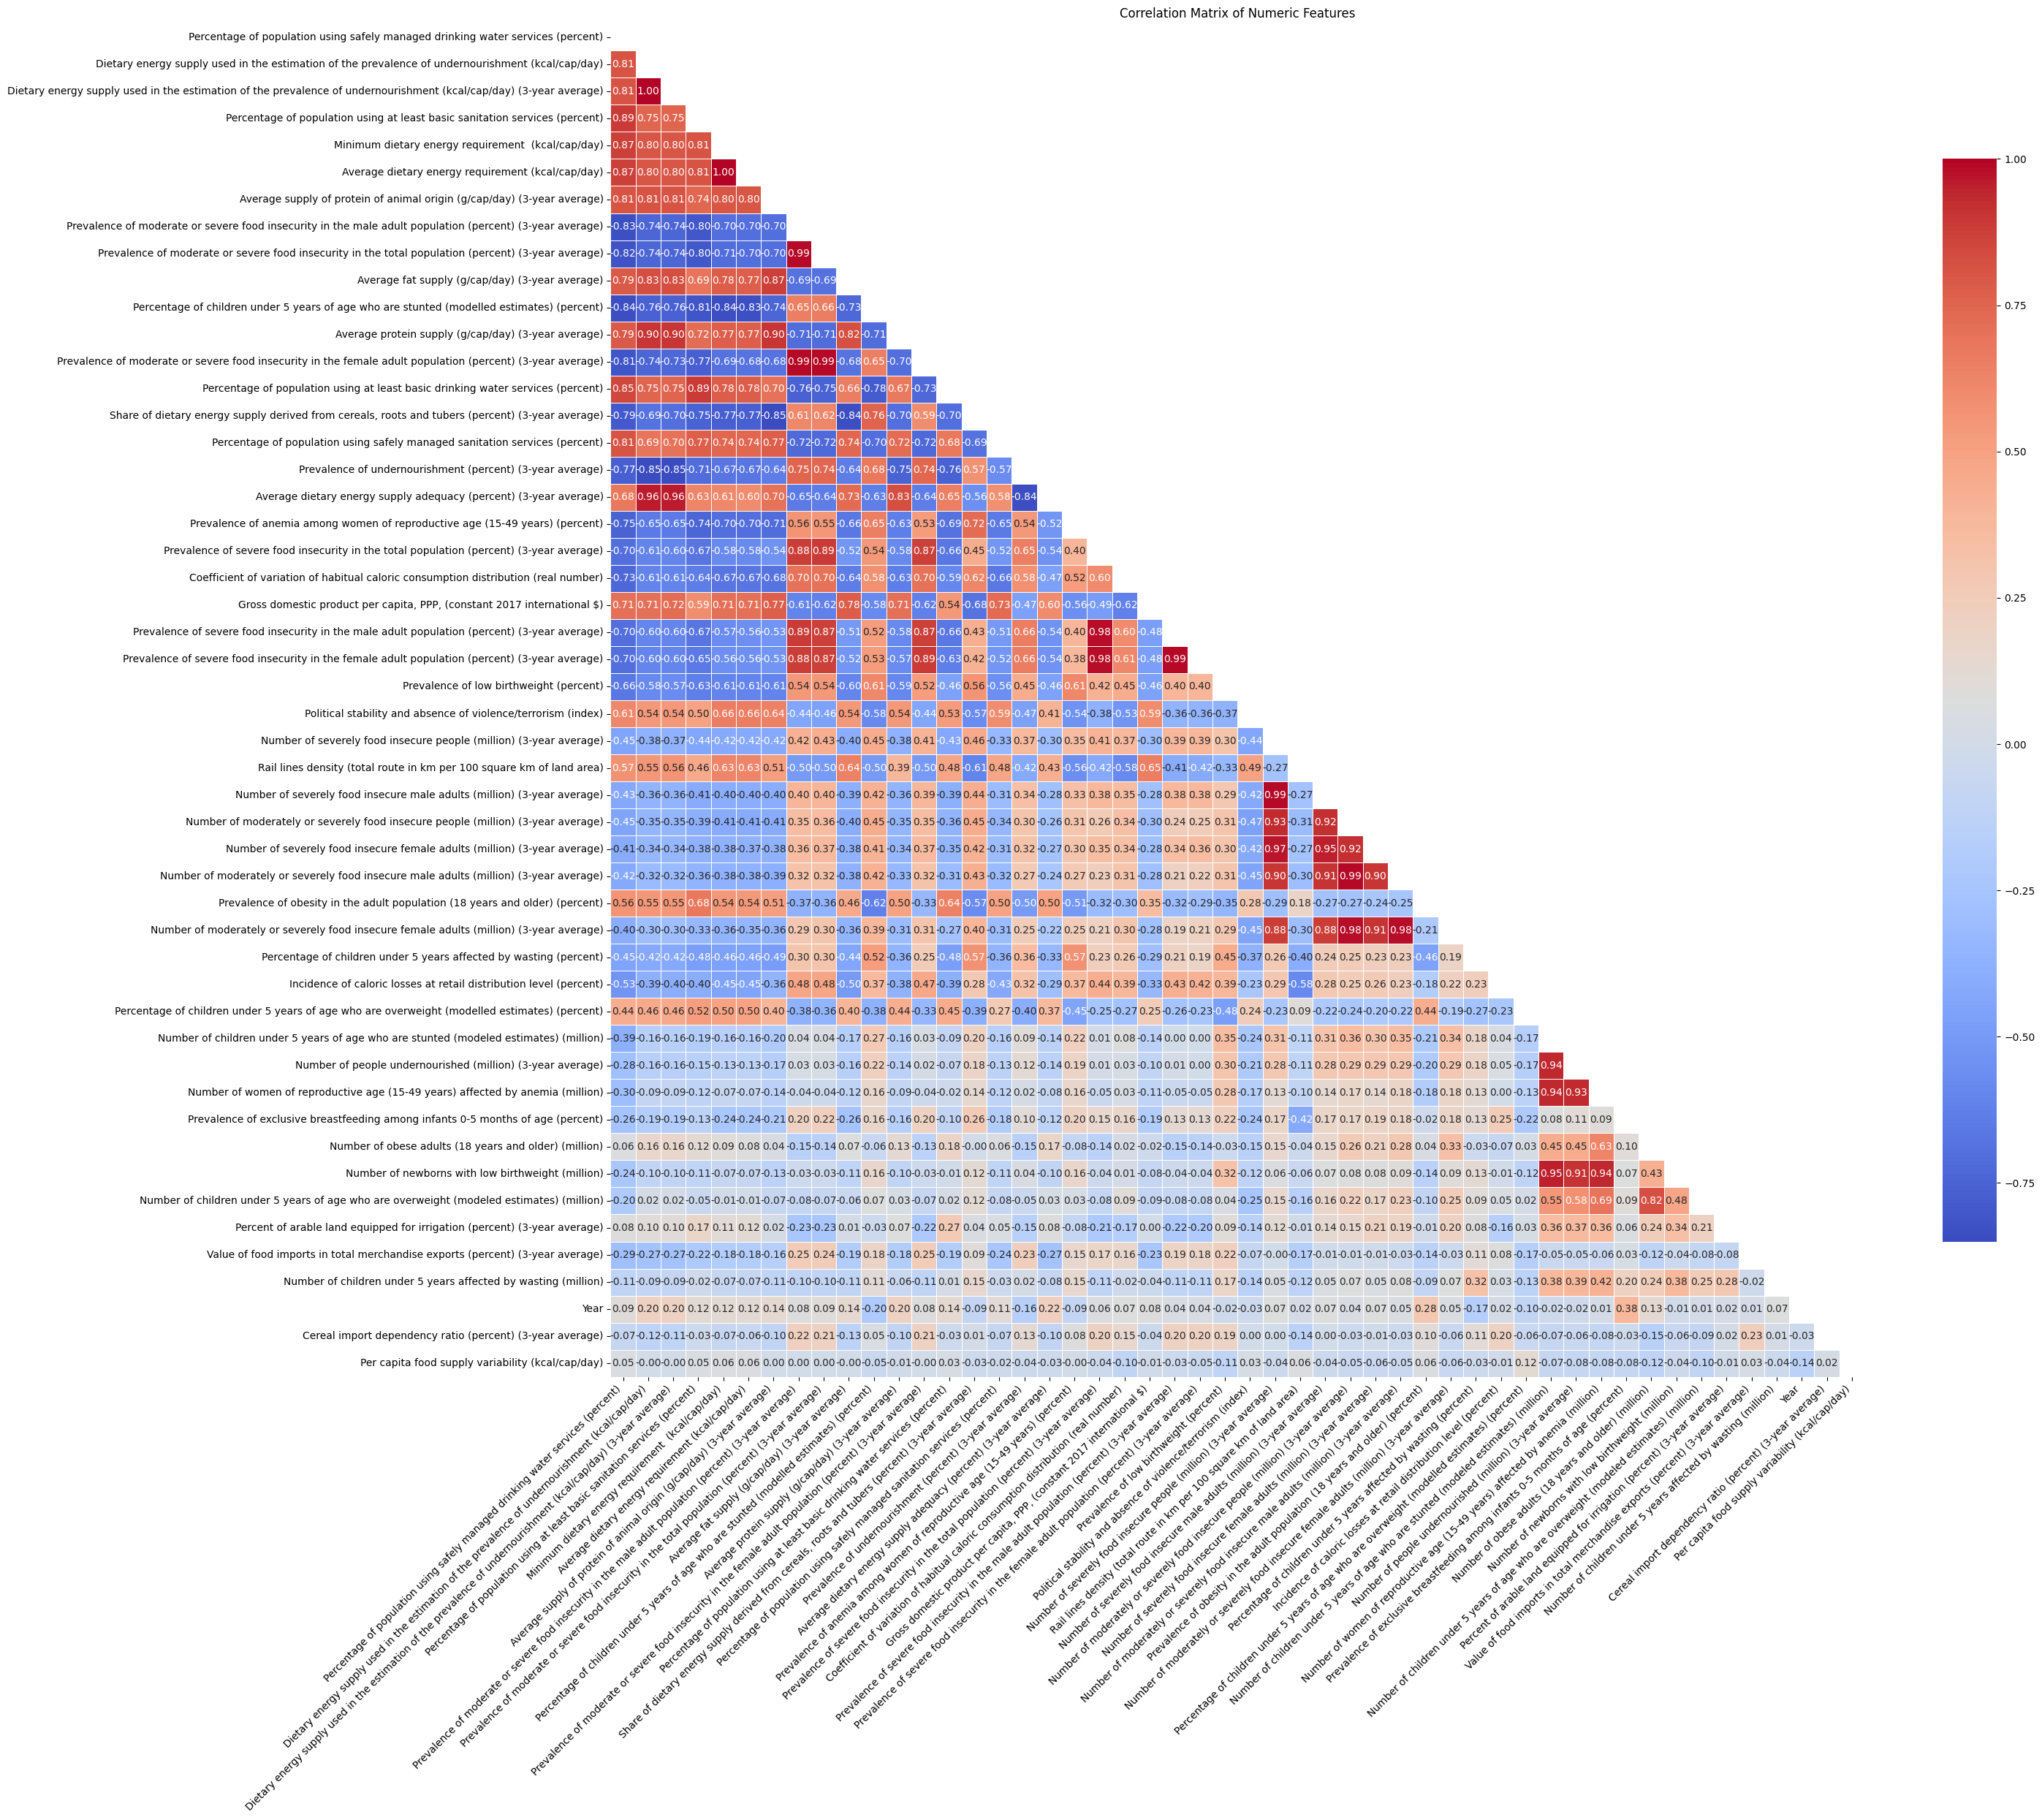

In [8]:
# Compute the correlation matrix and sort it
correlation_matrix = df[numeric_cols].corr().round(2)
sorted_cols = correlation_matrix.abs().sum().sort_values(ascending=False).index
correlation_matrix = correlation_matrix.loc[sorted_cols, sorted_cols]

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot
plt.figure(figsize=(len(correlation_matrix) * 0.6, len(correlation_matrix) * 0.5))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numeric Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 2.2 Missing Obersvations

### 2.2.1 Removing unecessary Columns & those with high missing % 

In [9]:
df = pd.read_excel(Dataset_Path)

df.head()

Year Continent          Area  \
0  2000    Africa       Algeria   
1  2000    Africa        Angola   
2  2000    Africa         Benin   
3  2000    Africa      Botswana   
4  2000    Africa  Burkina Faso   

   Average dietary energy requirement (kcal/cap/day)  \
0                                             2308.0   
1                                             2121.0   
2                                             2165.0   
3                                             2286.0   
4                                             2183.0   

   Average dietary energy supply adequacy (percent) (3-year average)  \
0                                              126.0                   
1                                               74.0                   
2                                              108.0                   
3                                               98.0                   
4                                              108.0                   

   Average fat supply (g/cap/day) (3-year average)  \
0                                             67.0   
1                                             39.4   
2                                             48.5   
3                                             48.4   
4                                             53.2   

   Average protein supply (g/cap/day) (3-year average)  \
0                                               77.7     
1                                               40.9     
2                                               56.2     
3                                               66.5     
4                                               69.6     

   Average supply of protein of animal origin (g/cap/day) (3-year average)  \
0                                               19.3                         
1                                               12.8                         
2                                                9.5                         
3                                               25.6                         
4                                                9.7                         

   Cereal import dependency ratio (percent) (3-year average)  \
0                                               79.7           
1                                               57.1           
2                                               13.0           
3                                               90.9           
4                                                9.0           

   Coefficient of variation of habitual caloric consumption distribution (real number)  \
0                                               0.30                                     
1                                               0.30                                     
2                                               0.28                                     
3                                               0.24                                     
4                                               0.34                                     

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   Prevalence of moderate or severe food insecurity in the male adult population (percent) (3-year average)  \
0                                                NaN                                                          
1                                                NaN                                                          
2                                                NaN                                                          
3                                                NaN                                                          
4                                                NaN                                                          

   Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)  \
0                                                NaN                                                     
1            

In [10]:
# Remove intuitively identical columns
cols_to_drop = ["Average dietary energy supply adequacy (percent) (3-year average)",
                "Minimum dietary energy requirement  (kcal/cap/day)",
                "Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day) (3-year average)",
                "Number of people undernourished (million) (3-year average)",
                "Coefficient of variation of habitual caloric consumption distribution (real number)",
                "Number of moderately or severely food insecure female adults (million) (3-year average)",
                "Number of moderately or severely food insecure male adults (million) (3-year average)",
                "Number of moderately or severely food insecure people (million) (3-year average)",
                "Number of children under 5 years of age who are stunted (modeled estimates) (million)",
                "Number of children under 5 years affected by wasting (million)",
                "Number of children under 5 years of age who are overweight (modeled estimates) (million)",
                "Number of severely food insecure people (million) (3-year average)",
                "Number of severely food insecure female adults (million) (3-year average)",
                "Number of severely food insecure male adults (million) (3-year average)",
                "Number of newborns with low birthweight (million)",
                "Number of women of reproductive age (15-49 years) affected by anemia (million)",
                "Number of obese adults (18 years and older) (million)"
                ]

df = df.drop(columns= cols_to_drop, axis=1)

In [11]:
df_new = df[df["Year"]>=2014].reset_index()

In [12]:
# Shows number and percentage of missing values for each column
missing_counts = df_new.isnull().sum()
missing_percent = (df_new.isnull().sum() / len(df_new)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent.round(2)
}).sort_values(by='Missing %', ascending=False)

missing_df

Missing Count  Missing %
Rail lines density (total route in km per 100 s...           1078      68.66
Percentage of population using safely managed d...            678      43.18
Prevalence of anemia among women of reproductiv...            628      40.00
Percentage of population using safely managed s...            622      39.62
Prevalence of low birthweight (percent)                       471      30.00
Prevalence of exclusive breastfeeding among inf...            403      25.67
Cereal import dependency ratio (percent) (3-yea...            271      17.26
Percentage of children under 5 years affected b...            264      16.82
Percentage of population using at least basic s...            226      14.39
Percentage of population using at least basic d...            221      14.08
Share of dietary energy supply derived from cer...            213      13.57
Average fat supply (g/cap/day) (3-year average)               213      13.57
Average supply of protein of animal origin (g/c...            213      13.57
Average protein supply (g/cap/day) (3-year aver...            213      13.57
Gross domestic product per capita, PPP, (consta...            205      13.06
Per capita food supply variability (kcal/cap/day)             170      10.83
Value of food imports in total merchandise expo...            167      10.64
Political stability and absence of violence/ter...            166      10.57
Dietary energy supply used in the estimation of...            160      10.19
Prevalence of obesity in the adult population (...            157      10.00
Percent of arable land equipped for irrigation ...            157      10.00
Percentage of children under 5 years of age who...            157      10.00
Percentage of children under 5 years of age who...            157      10.00
Average dietary energy requirement (kcal/cap/day)              20       1.27
Incidence of caloric losses at retail distribut...             10       0.64
Continent                                                       0       0.00
Year                                                            0       0.00
index                                                           0       0.00
Area                                                            0       0.00
Prevalence of moderate or severe food insecurit...              0       0.00
Prevalence of moderate or severe food insecurit...              0       0.00
Prevalence of moderate or severe food insecurit...              0       0.00
Prevalence of severe food insecurity in the tot...              0       0.00
Prevalence of severe food insecurity in the mal...              0       0.00
Prevalence of severe food insecurity in the fem...              0       0.00
Prevalence of undernourishment (percent) (3-yea...              0       0.00

In [13]:
## Drop due to high missing percentage

columns_to_remove = [
    "Rail lines density (total route in km per 100 square km of land area)",
    "Prevalence of low birthweight (percent)",
    "Prevalence of anemia among women of reproductive age (15-49 years) (percent)",
    "Percentage of population using safely managed sanitation services (percent)",
    "Percentage of population using safely managed drinking water services (percent)"
]

df_new = df_new.drop(columns=columns_to_remove)

In [14]:
# cols = ["Percentage of population using at least basic drinking water services (percent)",
#     "Percentage of population using at least basic sanitation services (percent)",
#     "Percentage of population using safely managed drinking water services (percent)",
#     "Percentage of population using safely managed sanitation services (percent)"]

In [15]:
df_new["Water & Sanitation Index (percent)"] = df_new[[
    "Percentage of population using at least basic drinking water services (percent)",
    "Percentage of population using at least basic sanitation services (percent)"
]].mean(axis=1)

df_new["Moderate+Severe Food Insecurity (percent)"] = df_new[[
    "Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)",
    "Prevalence of moderate or severe food insecurity in the female adult population (percent) (3-year average)",
    "Prevalence of moderate or severe food insecurity in the male adult population (percent) (3-year average)"
]].mean(axis=1)  


df_new["Severe Food Insecurity (percent)"] = df_new[[
    "Prevalence of severe food insecurity in the total population (percent) (3-year average)",
    "Prevalence of severe food insecurity in the female adult population (percent) (3-year average)",
    "Prevalence of severe food insecurity in the male adult population (percent) (3-year average)"
]].mean(axis=1) 

In [16]:
columns_to_remove = [
    "Prevalence of severe food insecurity in the total population (percent) (3-year average)",
    "Prevalence of severe food insecurity in the female adult population (percent) (3-year average)",
    "Prevalence of severe food insecurity in the male adult population (percent) (3-year average)",
    "Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)",
    "Prevalence of moderate or severe food insecurity in the female adult population (percent) (3-year average)",
    "Prevalence of moderate or severe food insecurity in the male adult population (percent) (3-year average)",
    "Percentage of population using at least basic drinking water services (percent)",
    "Percentage of population using at least basic sanitation services (percent)"
]

# Drop the specified columns
df_new = df_new.drop(columns=columns_to_remove)

### 2.2.2 Creating a series of missing data indicator for checking MAR assumption

In [17]:
for col in df_new.columns:
    df_new[f'{col}_missing'] = df_new[col].isnull().astype(int)

In [18]:
# Check corraltion between missing data indicator and other variables
excluded_columns = ['Year', 'Continent', 'Area']  
df_filtered = df_new.drop(columns=excluded_columns)


correlation_matrix = df_filtered.corr()

In [19]:
# Just print the need part for corraltion checking 

missing_columns = [col for col in df_new.columns if col.endswith('_missing') and col not in ['Year_missing', 'continents_missing', 'Area_missing']]
cor_missingness = correlation_matrix[missing_columns]

df_corr = cor_missingness


In [20]:
df_corr_filtered = df_corr[~df_corr.index.str.endswith('_missing')]
# df_corr_filtered

In [21]:
## For documentation

(df_corr).to_csv(Path(Documentation_Path) / "missing_corr.csv", index=True)
(df_corr_filtered).to_csv(Path(Documentation_Path) / "missing_corr_with_other_variables_only.csv", index= True)

In [22]:
# Check correlation between missing indicator and the variables (plot 1)

# df_corr_filtered.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

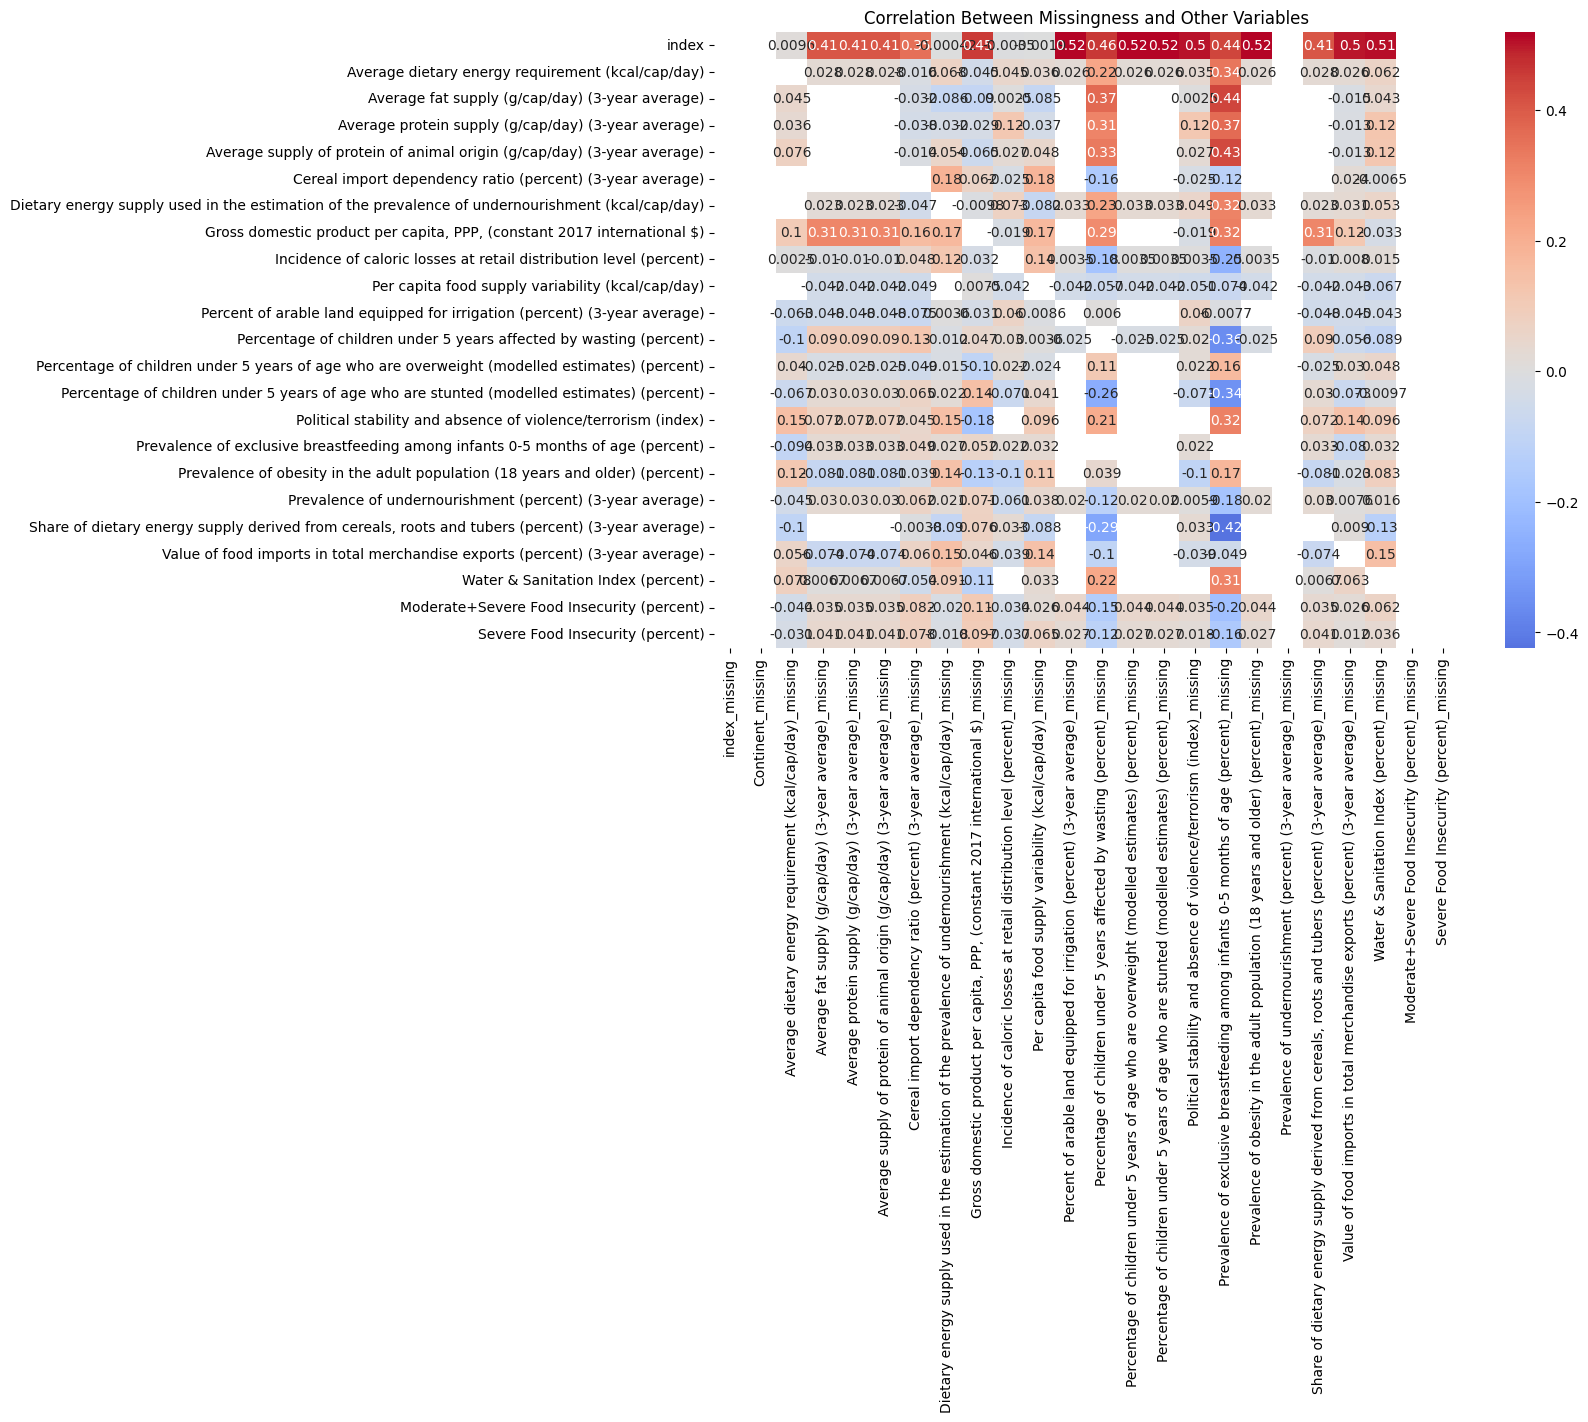

In [23]:
# Check correlation between missing indicator and the variables (plot 2)

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr_filtered, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Missingness and Other Variables')
plt.show()

### 2.2.3 Check missingness after dropping and aggregating 
df_new is for modelling, df is for EDA

In [24]:
## Checking missingness after dropping and aggregating 
missing_counts = df_new.isnull().sum()
missing_percent = (df_new.isnull().sum() / len(df_new)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent.round(2)
}).sort_values(by='Missing %', ascending=False)

missing_df

Missing Count  Missing %
Prevalence of exclusive breastfeeding among inf...            403      25.67
Cereal import dependency ratio (percent) (3-yea...            271      17.26
Percentage of children under 5 years affected b...            264      16.82
Average fat supply (g/cap/day) (3-year average)               213      13.57
Average supply of protein of animal origin (g/c...            213      13.57
Average protein supply (g/cap/day) (3-year aver...            213      13.57
Share of dietary energy supply derived from cer...            213      13.57
Water & Sanitation Index (percent)                            211      13.44
Gross domestic product per capita, PPP, (consta...            205      13.06
Per capita food supply variability (kcal/cap/day)             170      10.83
Value of food imports in total merchandise expo...            167      10.64
Political stability and absence of violence/ter...            166      10.57
Dietary energy supply used in the estimation of...            160      10.19
Percentage of children under 5 years of age who...            157      10.00
Percentage of children under 5 years of age who...            157      10.00
Percent of arable land equipped for irrigation ...            157      10.00
Prevalence of obesity in the adult population (...            157      10.00
Average dietary energy requirement (kcal/cap/day)              20       1.27
Incidence of caloric losses at retail distribut...             10       0.64
Area                                                            0       0.00
index                                                           0       0.00
Year                                                            0       0.00
Continent                                                       0       0.00
Prevalence of undernourishment (percent) (3-yea...              0       0.00
Moderate+Severe Food Insecurity (percent)                       0       0.00
Severe Food Insecurity (percent)                                0       0.00
index_missing                                                   0       0.00
Year_missing                                                    0       0.00
Continent_missing                                               0       0.00
Area_missing                                                    0       0.00
Average dietary energy requirement (kcal/cap/da...              0       0.00
Average fat supply (g/cap/day) (3-year average)...              0       0.00
Average protein supply (g/cap/day) (3-year aver...              0       0.00
Average supply of protein of animal origin (g/c...              0       0.00
Cereal import dependency ratio (percent) (3-yea...              0       0.00
Dietary energy supply used in the estimation of...              0       0.00
Gross domestic product per capita, PPP, (consta...              0       0.00
Incidence of caloric losses at retail distribut...              0       0.00
Per capita food supply variability (kcal/cap/da...              0       0.00
Percent of arable land equipped for irrigation ...              0       0.00
Percentage of children under 5 years affected b...              0       0.00
Percentage of children under 5 years of age who...              0       0.00
Percentage of children under 5 years of age who...              0       0.00
Political stability and absence of violence/ter...              0       0.00
Prevalence of exclusive breastfeeding among inf...              0       0.00
Prevalence of obesity in the adult population (...              0       0.00
Prevalence of undernourishment (percent) (3-yea...              0       0.00
Share of dietary energy supply derived from cer...              0       0.00
Value of food imports in total merchandise expo...              0       0.00
Water & Sanitation Index (percent)_missing                      0       0.00
Moderate+Severe Food Insecurity (percent)_missing               0       0.00
Severe Food Insecurity (percent)_missing        

## 2.3 Imputation

In [25]:
# Define the target columns (missingness between 9% -30%)
columns_to_impute = [
    'Severe Food Insecurity (percent)',
    'Moderate+Severe Food Insecurity (percent)',
    'Cereal import dependency ratio (percent) (3-year average)',
    'Average fat supply (g/cap/day) (3-year average)',
    'Average protein supply (g/cap/day) (3-year average)',
    'Average supply of protein of animal origin (g/cap/day) (3-year average)',
    'Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)',
    'Water & Sanitation Index (percent)',
    'Gross domestic product per capita, PPP, (constant 2017 international $)',
    'Per capita food supply variability (kcal/cap/day)',
    'Value of food imports in total merchandise exports (percent) (3-year average)',
    'Political stability and absence of violence/terrorism (index)',
    'Prevalence of undernourishment (percent) (3-year average)',
    'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
    'Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)',
    'Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent)',
    'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
    'Percent of arable land equipped for irrigation (percent) (3-year average)',
    'Prevalence of obesity in the adult population (18 years and older) (percent)',
    'Percentage of children under 5 years affected by wasting (percent)',
    'Average dietary energy requirement (kcal/cap/day)',
    'Incidence of caloric losses at retail distribution level (percent)'
]


### 2.3.1 Group based on country for temporal consistency 
Using BayesianRidge for imputation

### 2.3.2 Compared with RandomForestRegressor

In [26]:
# Filter out the columns to be imputed
df_subset = df_new[columns_to_impute].copy()

# Initialize MICE
br_imputer = IterativeImputer(
    estimator=BayesianRidge(),  # Chosen because of the linear relationship between variables
    max_iter=10,                
    random_state=42,
    imputation_order='ascending' 
) 

# Fit and transform the data
df_br_imputed = pd.DataFrame(br_imputer.fit_transform(df_subset), columns=columns_to_impute)

C:\Users\Callum\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [27]:
df_br_imputed.head()

Severe Food Insecurity (percent)  \
0                         13.000000   
1                         17.197222   
2                         10.433333   
3                         18.433333   
4                         17.197222   

   Moderate+Severe Food Insecurity (percent)  \
0                                  22.900000   
1                                  45.919444   
2                                  55.000000   
3                                  46.466667   
4                                  45.919444   

   Cereal import dependency ratio (percent) (3-year average)  \
0                                               70.2           
1                                               65.6           
2                                               44.2           
3                                               95.5           
4                                               13.8           

   Average fat supply (g/cap/day) (3-year average)  \
0                                             99.4   
1                                             57.4   
2                                             51.2   
3                                             74.4   
4                                             61.5   

   Average protein supply (g/cap/day) (3-year average)  \
0                                               94.9     
1                                               55.4     
2                                               70.1     
3                                               71.7     
4                                               76.4     

   Average supply of protein of animal origin (g/cap/day) (3-year average)  \
0                                               29.8                         
1                                               22.0                         
2                                               17.5                         
3                                               32.2                         
4                                               12.3                         

   Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)  \
0                                               48.0                                                  
1                                               60.0                                                  
2                                               66.0                                                  
3                                               48.0                                                  
4                                               65.0                                                  

   Water & Sanitation Index (percent)  \
0                                90.0   
1                                50.0   
2                                41.0   
3                                80.5   
4                                35.5   

   Gross domestic product per capita, PPP, (constant 2017 international $)  \
0                                            13515.3                         
1                                            10262.8                         
2                                             3104.2                         
3                                            16381.1                         
4                                             2094.1                         

   Per capita food supply variability (kcal/cap/day)  ...  \
0                                               45.0  ...   
1                                              168.0  ...   
2                                               11.0  ...   
3                                                9.0  ...   
4                                               20.0  ...   

   Prevalence of undernourishment (percent) (3-year average)  \
0                                                2.9           
1                                               13.2           
2                                                9.3     

In [28]:
df_subset.corr().style.background_gradient(cmap='coolwarm')

In [29]:
rf_imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=34)
df_rf_imputed = pd.DataFrame(rf_imputer.fit_transform(df_subset), columns=columns_to_impute)

C:\Users\Callum\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [30]:
df_rf_imputed.head()

Severe Food Insecurity (percent)  \
0                         13.000000   
1                         17.197222   
2                         10.433333   
3                         18.433333   
4                         17.197222   

   Moderate+Severe Food Insecurity (percent)  \
0                                  22.900000   
1                                  45.919444   
2                                  55.000000   
3                                  46.466667   
4                                  45.919444   

   Cereal import dependency ratio (percent) (3-year average)  \
0                                               70.2           
1                                               65.6           
2                                               44.2           
3                                               95.5           
4                                               13.8           

   Average fat supply (g/cap/day) (3-year average)  \
0                                             99.4   
1                                             57.4   
2                                             51.2   
3                                             74.4   
4                                             61.5   

   Average protein supply (g/cap/day) (3-year average)  \
0                                               94.9     
1                                               55.4     
2                                               70.1     
3                                               71.7     
4                                               76.4     

   Average supply of protein of animal origin (g/cap/day) (3-year average)  \
0                                               29.8                         
1                                               22.0                         
2                                               17.5                         
3                                               32.2                         
4                                               12.3                         

   Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)  \
0                                               48.0                                                  
1                                               60.0                                                  
2                                               66.0                                                  
3                                               48.0                                                  
4                                               65.0                                                  

   Water & Sanitation Index (percent)  \
0                                90.0   
1                                50.0   
2                                41.0   
3                                80.5   
4                                35.5   

   Gross domestic product per capita, PPP, (constant 2017 international $)  \
0                                            13515.3                         
1                                            10262.8                         
2                                             3104.2                         
3                                            16381.1                         
4                                             2094.1                         

   Per capita food supply variability (kcal/cap/day)  ...  \
0                                               45.0  ...   
1                                              168.0  ...   
2                                               11.0  ...   
3                                                9.0  ...   
4                                               20.0  ...   

   Prevalence of undernourishment (percent) (3-year average)  \
0                                                2.9           
1                                               13.2           
2                                                9.3     

### 2.3.3 KDE distribution plot

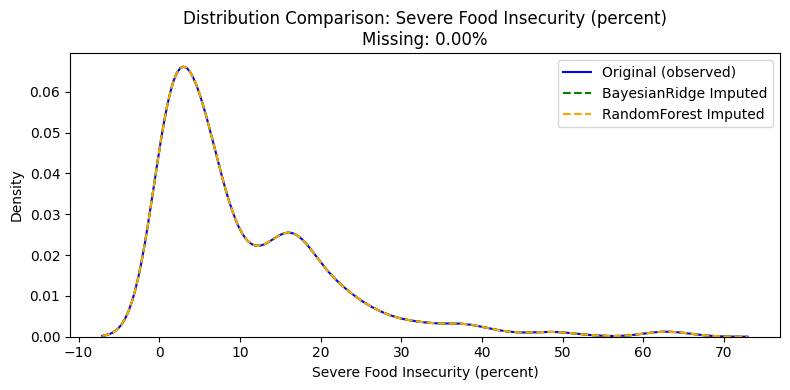

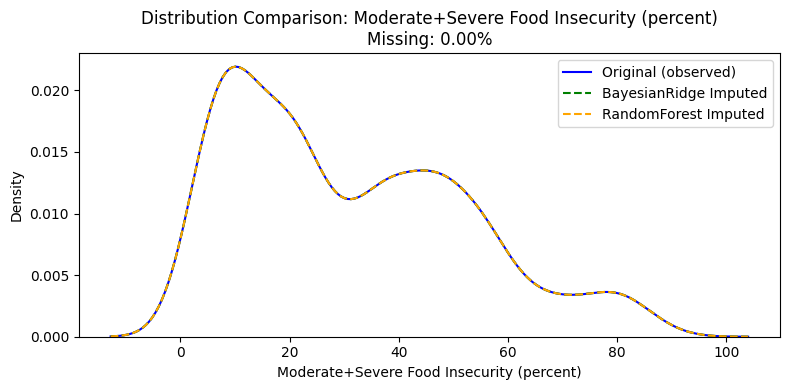

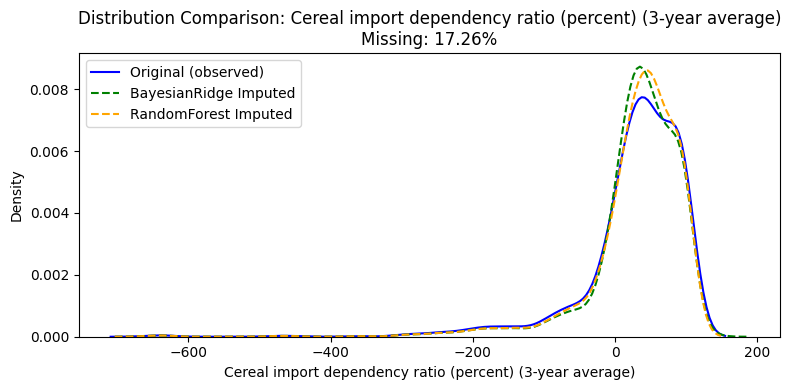

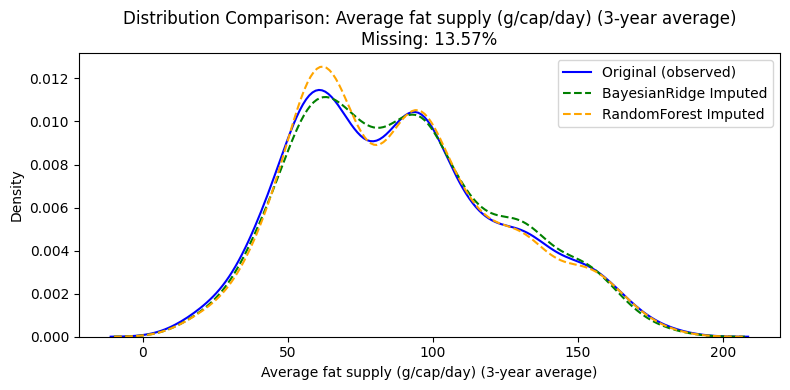

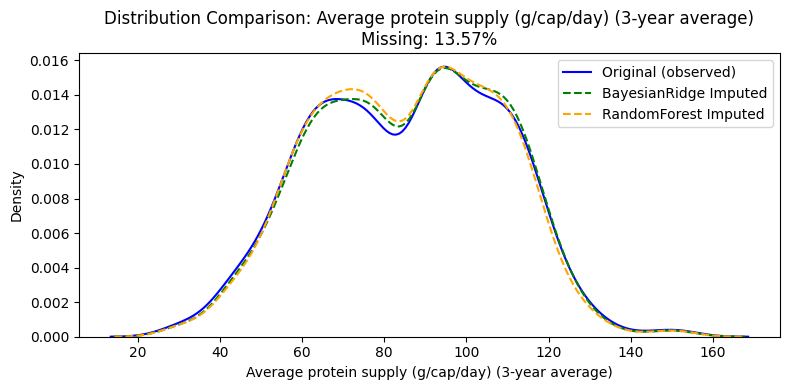

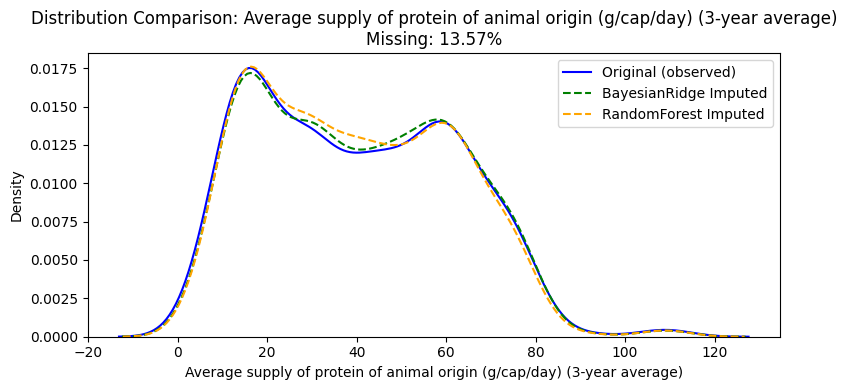

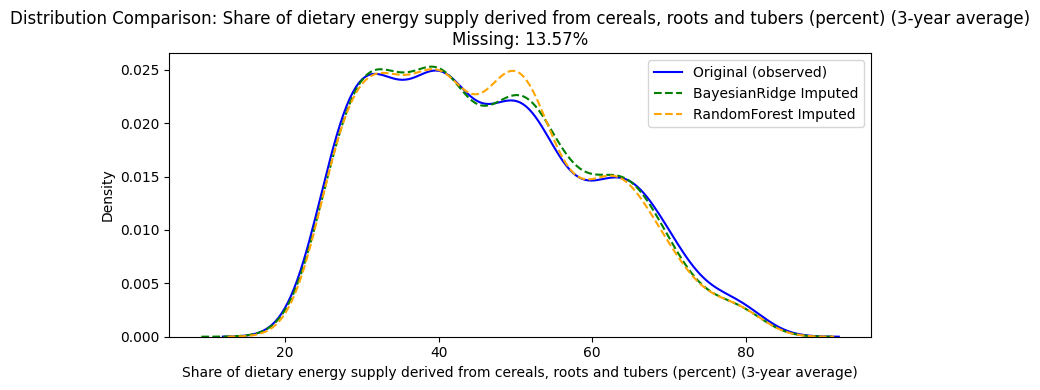

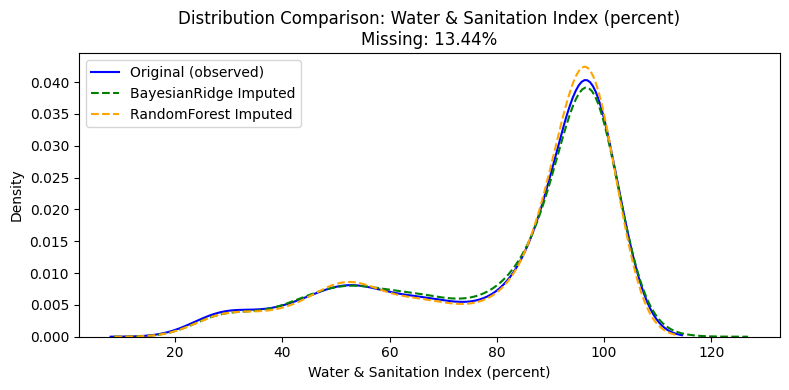

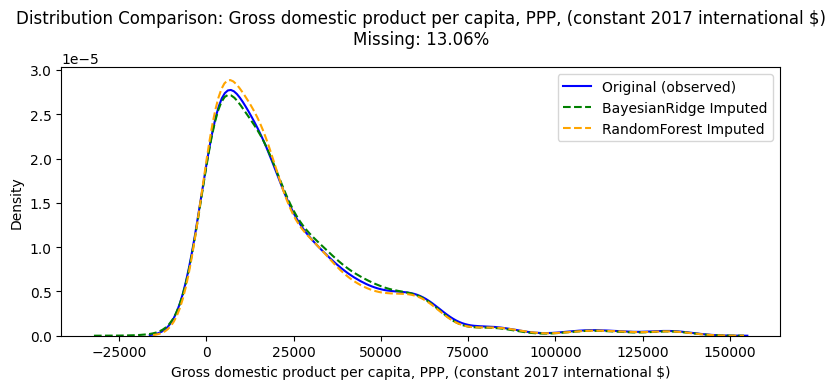

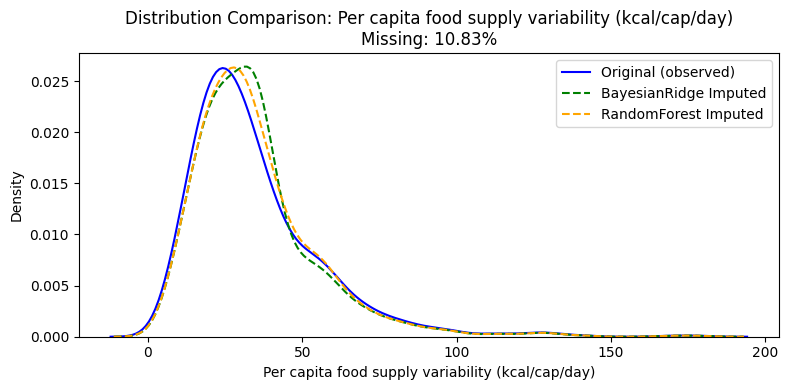

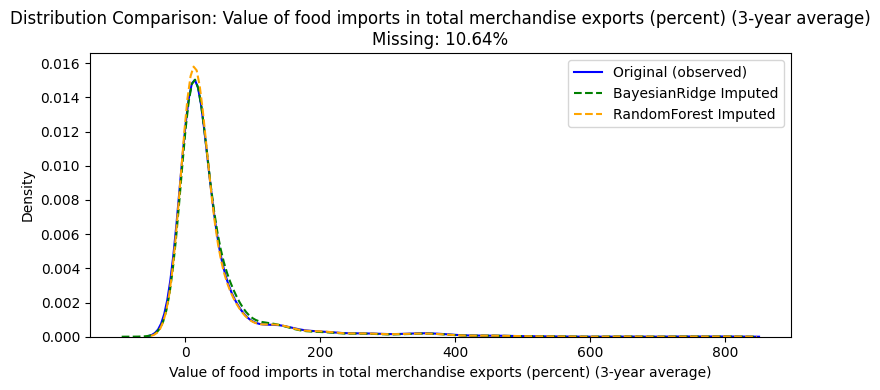

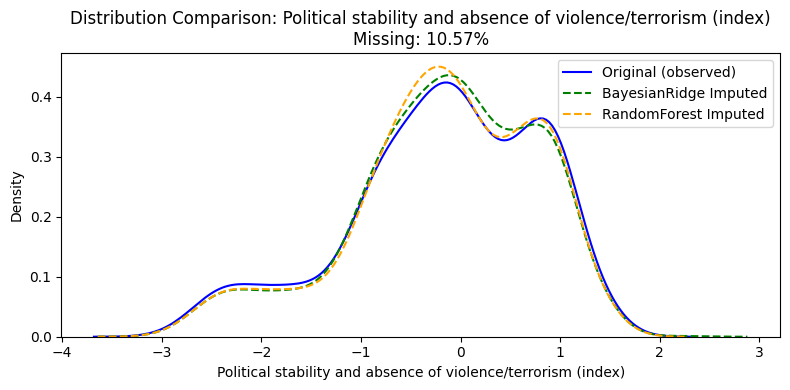

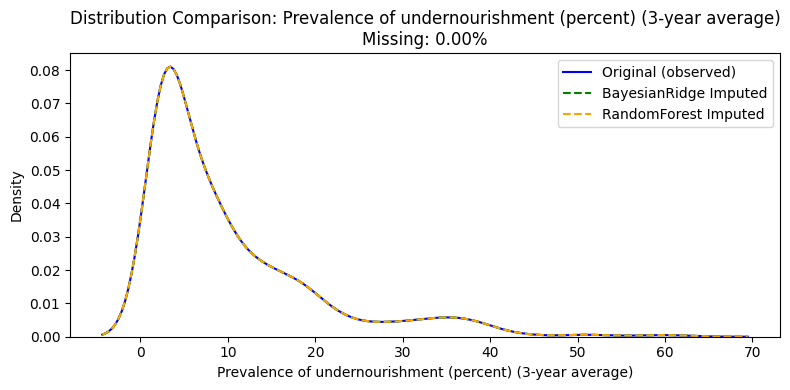

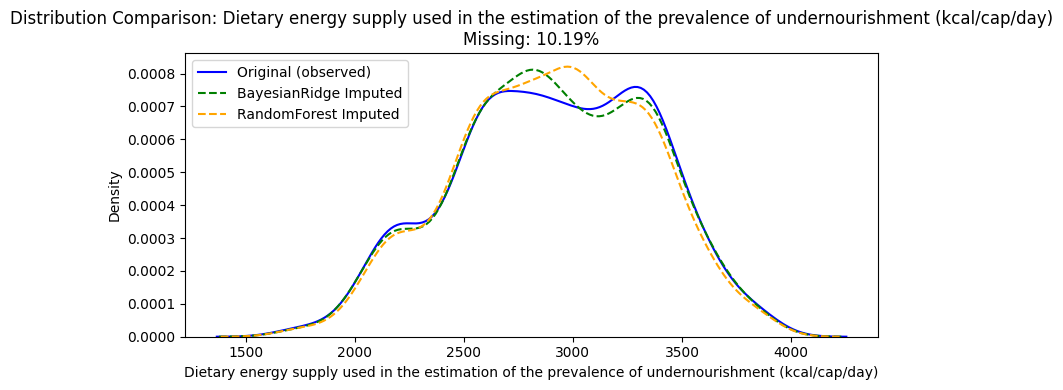

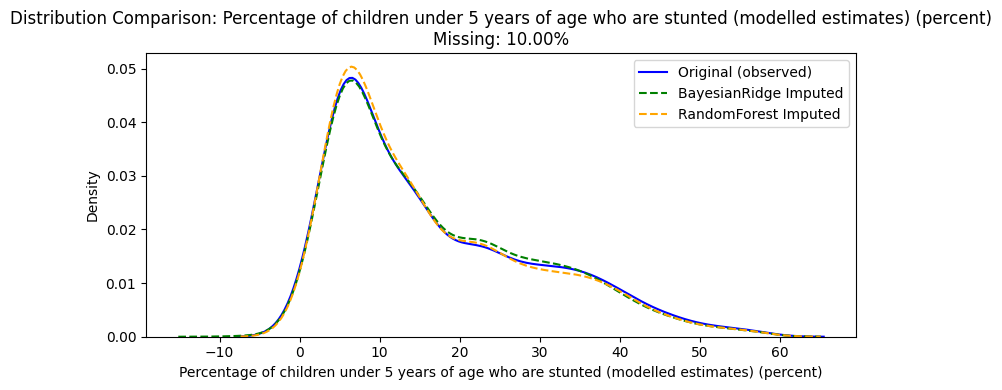

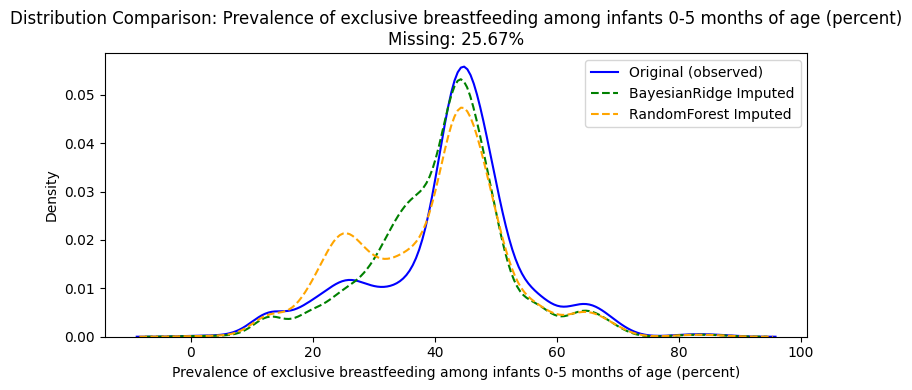

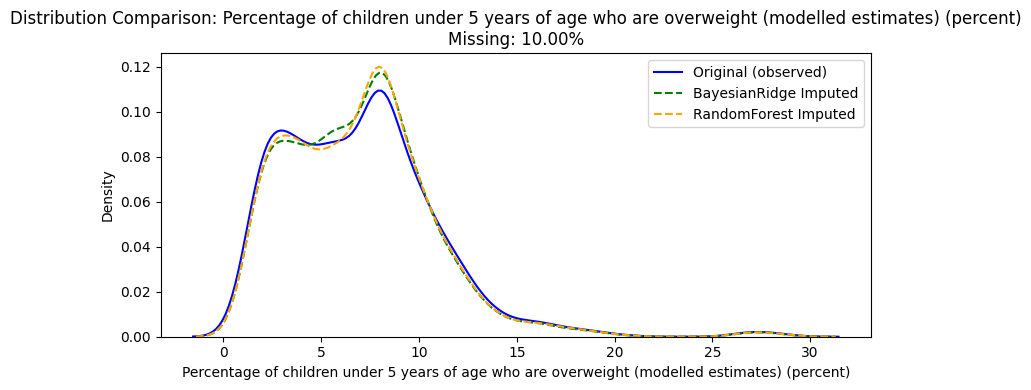

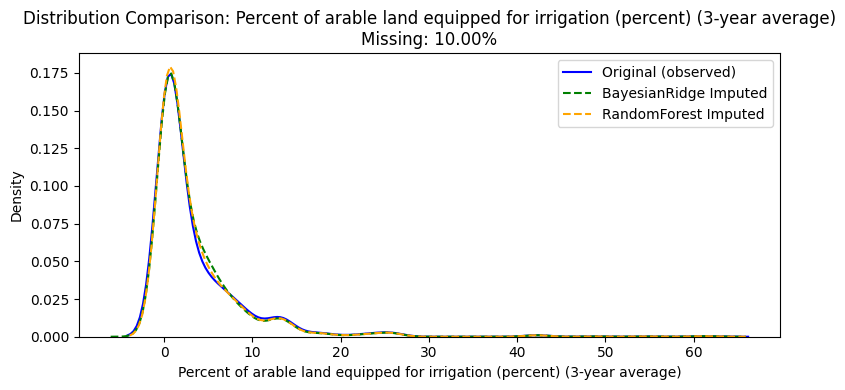

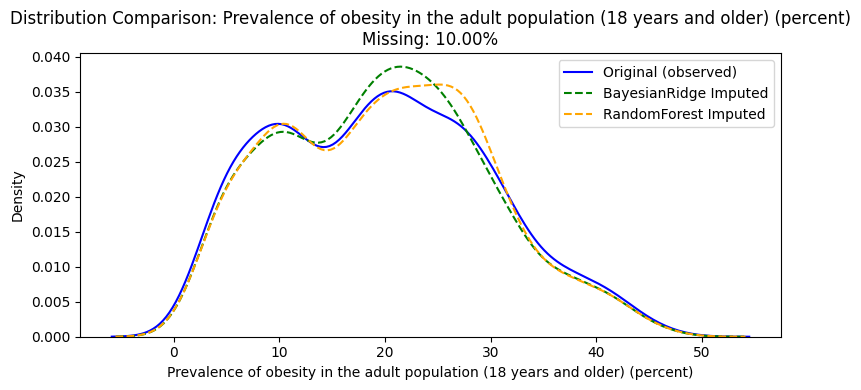

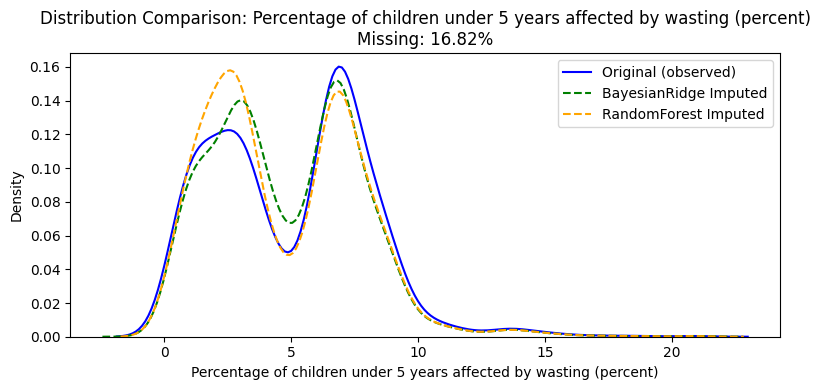

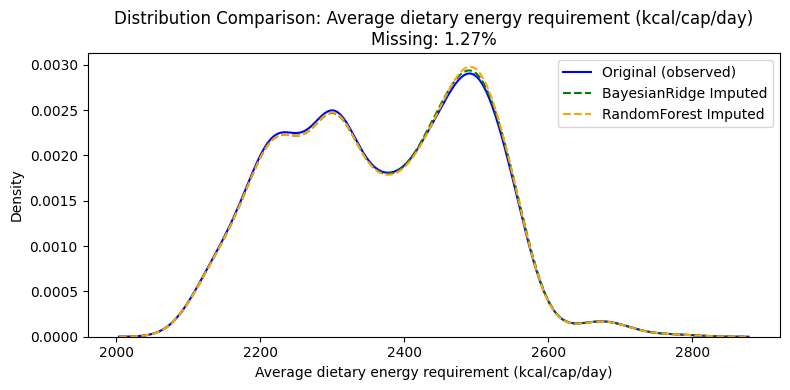

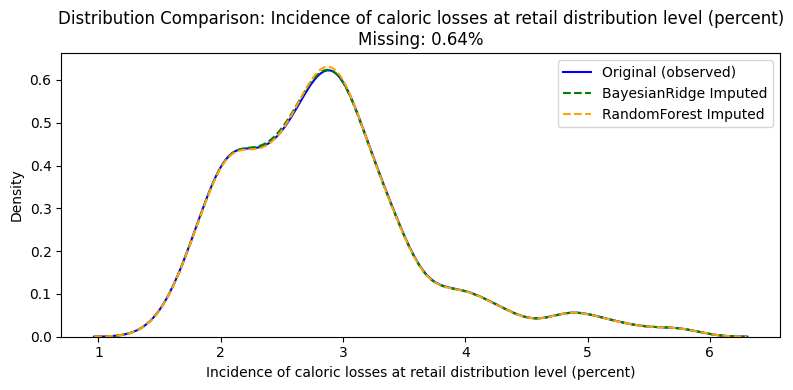

In [31]:
# Check every variable
for col in columns_to_impute:
    plt.figure(figsize=(8, 4))
    
    missing_pct = df_subset[col].isna().mean() * 100

    # Compare between the non-nulls and imputed
    sns.kdeplot(df_subset[col].dropna(), label='Original (observed)', color='blue')
    
    # Plot imputed full distributions (includes imputed + original)
    sns.kdeplot(df_br_imputed[col], label='BayesianRidge Imputed', color='green', linestyle='--')
    sns.kdeplot(df_rf_imputed[col], label='RandomForest Imputed', color='orange', linestyle='--')
    
    plt.title(f'Distribution Comparison: {col}\nMissing: {missing_pct:.2f}%')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

### 2.3.4 Deciding on the imputation method

So the point is based on the above distribution, decide to use either method on each variable to get best result.

After the imputation, i will proceed to aggregate some variables.

I deleted and aggregated some in the very beginning because it would not affect the imputation and it makes things easier without deviating from the original data. (as in the scale/ range would not change, eventhough the value itself is a sum/mean of certain variables.) and yes, it will cause a few outliers if we aggregate columns with NA and non-null value, but after inspection, it is only a few cases so it wont be an issue

In [32]:
## Separate columns to impute based on estimator performance
br_columns = [
    'Severe Food Insecurity (percent)',
    'Moderate+Severe Food Insecurity (percent)',
    'Average fat supply (g/cap/day) (3-year average)',
    'Average protein supply (g/cap/day) (3-year average)',
    'Average supply of protein of animal origin (g/cap/day) (3-year average)',
    'Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)',
    'Water & Sanitation Index (percent)',
    'Gross domestic product per capita, PPP, (constant 2017 international $)',
    'Value of food imports in total merchandise exports (percent) (3-year average)',
    'Political stability and absence of violence/terrorism (index)',
    'Prevalence of undernourishment (percent) (3-year average)',
    'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
    'Percent of arable land equipped for irrigation (percent) (3-year average)'
]

rf_columns = [col for col in columns_to_impute if col not in br_columns]

In [33]:
## Substitute different imputation into the df
df_final_imputed = df_subset.copy()

for col in br_columns:
    df_final_imputed[col] = df_br_imputed[col]

for col in rf_columns:
    df_final_imputed[col] = df_rf_imputed[col]

In [34]:
df_non_imputed = df_new.drop(columns=columns_to_impute)
df_cleaned = pd.concat([df_non_imputed, df_final_imputed], axis=1)


df_cleaned = df_cleaned[df_new.columns]
df_cleaned = df_cleaned.drop(columns=[col for col in df_cleaned.columns if col.endswith('_missing')])


In [35]:
df_cleaned.isna().sum()

index                                                                                                0
Year                                                                                                 0
Continent                                                                                            0
Area                                                                                                 0
Average dietary energy requirement (kcal/cap/day)                                                    0
Average fat supply (g/cap/day) (3-year average)                                                      0
Average protein supply (g/cap/day) (3-year average)                                                  0
Average supply of protein of animal origin (g/cap/day) (3-year average)                              0
Cereal import dependency ratio (percent) (3-year average)                                            0
Dietary energy supply used in the estimation of the prevalence of underno

## 2.4 Checking range to view if imputation is valid

In [36]:
for col in df_cleaned.columns:
    col_min = df_cleaned[col].min()
    col_max = df_cleaned[col].max()
    print(f"{col}: min = {col_min}, max = {col_max}")

index: min = 2198, max = 3767
Year: min = 2014, max = 2023
Continent: min = Africa, max = South_America
Area: min = Afghanistan, max = Zimbabwe
Average dietary energy requirement (kcal/cap/day): min = 2095.0, max = 2787.0
Average fat supply (g/cap/day) (3-year average): min = 14.1, max = 183.6
Average protein supply (g/cap/day) (3-year average): min = 29.6, max = 152.4
Average supply of protein of animal origin (g/cap/day) (3-year average): min = 2.6, max = 111.9
Cereal import dependency ratio (percent) (3-year average): min = -654.8, max = 100.0
Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day): min = 1685.0, max = 3936.0
Gross domestic product per capita, PPP, (constant 2017 international $): min = -16104.245176487108, max = 137947.0
Incidence of caloric losses at retail distribution level (percent): min = 1.51, max = 5.76
Per capita food supply variability (kcal/cap/day): min = 3.0, max = 179.0
Percent of arable land equipped for irrig

In [37]:
invalid_conditions = {
    'Gross domestic product per capita, PPP, (constant 2017 international $)': lambda x: x < 0,
    'Percent of arable land equipped for irrigation (percent) (3-year average)': lambda x: x < 0,
    'Prevalence of undernourishment (percent) (3-year average)': lambda x: x < 0,
    'Value of food imports in total merchandise exports (percent) (3-year average)': lambda x: x < 0,
    'Severe Food Insecurity (percent)': lambda x: x < 0,
    'Water & Sanitation Index (percent)': lambda x: x > 100
}

# Loop and print invalid values for each column
for col, condition in invalid_conditions.items():
    invalid_rows = df_new[condition(df_new[col])]
    if not invalid_rows.empty:
        print(f"\nInvalid values for: {col}")
        print(invalid_rows[[col]])

In [38]:
# Loop and print invalid values for each column
for col, condition in invalid_conditions.items():
    invalid_rows = df_cleaned[condition(df_cleaned[col])]
    if not invalid_rows.empty:
        print(f"\nInvalid values for: {col}")
        print(invalid_rows[[col]])


Invalid values for: Gross domestic product per capita, PPP, (constant 2017 international $)
      Gross domestic product per capita, PPP, (constant 2017 international $)
515                                          -89.424022                      
672                                          -55.817386                      
829                                         -494.276188                      
1187                                       -3621.456169                      
1307                                      -16104.245176                      
1344                                       -7889.669837                      
1414                                       -6714.184730                      
1415                                        -864.923416                      
1418                                      -10043.340704                      
1421                                       -5405.406689                      
1423                                       -8121.

### 2.4.1 Clipping range so that is it bounded in valid range

In [39]:
clip_ranges = {
    "Gross domestic product per capita, PPP, (constant 2017 international $)": (0, None),
    "Percent of arable land equipped for irrigation (percent) (3-year average)": (0, 100),
    "Prevalence of undernourishment (percent) (3-year average)": (0, 100),
    "Value of food imports in total merchandise exports (percent) (3-year average)": (0, None),  # actual max if needed
    'Severe Food Insecurity (percent)':(0,100),
    'Water & Sanitation Index (percent)': (0,100)
}

# Apply clipping to each column
for col, (low, high) in clip_ranges.items():
    df_final_imputed[col] = df_final_imputed[col].clip(lower=low, upper=high)

In [40]:
df_non_imputed = df_new.drop(columns=columns_to_impute)
df_cleaned = pd.concat([df_non_imputed, df_final_imputed], axis=1)


df_cleaned = df_cleaned[df_new.columns]
df_cleaned = df_cleaned.drop(columns=[col for col in df_cleaned.columns if col.endswith('_missing')])

In [41]:
df_cleaned.isna().sum()

index                                                                                                0
Year                                                                                                 0
Continent                                                                                            0
Area                                                                                                 0
Average dietary energy requirement (kcal/cap/day)                                                    0
Average fat supply (g/cap/day) (3-year average)                                                      0
Average protein supply (g/cap/day) (3-year average)                                                  0
Average supply of protein of animal origin (g/cap/day) (3-year average)                              0
Cereal import dependency ratio (percent) (3-year average)                                            0
Dietary energy supply used in the estimation of the prevalence of underno

In [42]:
for col in df_cleaned.columns:
    col_min = df_cleaned[col].min()
    col_max = df_cleaned[col].max()
    print(f"{col}: min = {col_min}, max = {col_max}")

index: min = 2198, max = 3767
Year: min = 2014, max = 2023
Continent: min = Africa, max = South_America
Area: min = Afghanistan, max = Zimbabwe
Average dietary energy requirement (kcal/cap/day): min = 2095.0, max = 2787.0
Average fat supply (g/cap/day) (3-year average): min = 14.1, max = 183.6
Average protein supply (g/cap/day) (3-year average): min = 29.6, max = 152.4
Average supply of protein of animal origin (g/cap/day) (3-year average): min = 2.6, max = 111.9
Cereal import dependency ratio (percent) (3-year average): min = -654.8, max = 100.0
Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day): min = 1685.0, max = 3936.0
Gross domestic product per capita, PPP, (constant 2017 international $): min = 0.0, max = 137947.0
Incidence of caloric losses at retail distribution level (percent): min = 1.51, max = 5.76
Per capita food supply variability (kcal/cap/day): min = 3.0, max = 179.0
Percent of arable land equipped for irrigation (percent) 

## 2.5 Saving cleaned dataset

In [43]:
df_cleaned.to_csv(Final_Cleaned,index=False)

# 3. Exploratory Data Analysis

In [44]:
# Read the CSV file
df = pd.read_csv(Final_Cleaned)
df.head()

index  Year Continent          Area  \
0   2198  2014    Africa       Algeria   
1   2199  2014    Africa        Angola   
2   2200  2014    Africa         Benin   
3   2201  2014    Africa      Botswana   
4   2202  2014    Africa  Burkina Faso   

   Average dietary energy requirement (kcal/cap/day)  \
0                                             2321.0   
1                                             2129.0   
2                                             2204.0   
3                                             2334.0   
4                                             2198.0   

   Average fat supply (g/cap/day) (3-year average)  \
0                                             99.4   
1                                             57.4   
2                                             51.2   
3                                             74.4   
4                                             61.5   

   Average protein supply (g/cap/day) (3-year average)  \
0                                               94.9     
1                                               55.4     
2                                               70.1     
3                                               71.7     
4                                               76.4     

   Average supply of protein of animal origin (g/cap/day) (3-year average)  \
0                                               29.8                         
1                                               22.0                         
2                                               17.5                         
3                                               32.2                         
4                                               12.3                         

   Cereal import dependency ratio (percent) (3-year average)  \
0                                               70.2           
1                                               65.6           
2                                               44.2           
3                                               95.5           
4                                               13.8           

   Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)  \
0                                             3437.0                                                   
1                                             2553.0                                                   
2                                             2656.0                                                   
3                                             2550.0                                                   
4                                             2648.0                                                   

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)  \
0                                               11.1                                            
1                                               34.1                                            
2                                               33.1                                            
3                                               23.2                                            
4                                               29.9                                            

   Political stability and absence of violence/terrorism (index)  \
0                                              -1.19               
1                                              -0.33               
2                                               0.03               
3                                               1.01               
4                                              -0.79               

   Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent)  \
0                                               49.2                                 
1                                  

In [45]:
df.columns

Index(['index', 'Year', 'Continent', 'Area',
       'Average dietary energy requirement (kcal/cap/day)',
       'Average fat supply (g/cap/day) (3-year average)',
       'Average protein supply (g/cap/day) (3-year average)',
       'Average supply of protein of animal origin (g/cap/day) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
       'Gross domestic product per capita, PPP, (constant 2017 international $)',
       'Incidence of caloric losses at retail distribution level (percent)',
       'Per capita food supply variability (kcal/cap/day)',
       'Percent of arable land equipped for irrigation (percent) (3-year average)',
       'Percentage of children under 5 years affected by wasting (percent)',
       'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
       'Percentage of children un

In [46]:
num_cols = df.select_dtypes(include=['Float64', 'int64']).columns
df[num_cols] = df[num_cols].round(1)

In [47]:
df

index  Year      Continent          Area  \
0      2198  2014         Africa       Algeria   
1      2199  2014         Africa        Angola   
2      2200  2014         Africa         Benin   
3      2201  2014         Africa      Botswana   
4      2202  2014         Africa  Burkina Faso   
...     ...   ...            ...           ...   
1565   3763  2023  South_America        Guyana   
1566   3764  2023  South_America      Paraguay   
1567   3765  2023  South_America          Peru   
1568   3766  2023  South_America      Suriname   
1569   3767  2023  South_America       Uruguay   

      Average dietary energy requirement (kcal/cap/day)  \
0                                                2321.0   
1                                                2129.0   
2                                                2204.0   
3                                                2334.0   
4                                                2198.0   
...                                                 ...   
1565                                             2318.0   
1566                                             2370.0   
1567                                             2317.0   
1568                                             2390.0   
1569                                             2445.0   

      Average fat supply (g/cap/day) (3-year average)  \
0                                                99.4   
1                                                57.4   
2                                                51.2   
3                                                74.4   
4                                                61.5   
...                                               ...   
1565                                             95.8   
1566                                             92.0   
1567                                             71.4   
1568                                             72.9   
1569                                            106.4   

      Average protein supply (g/cap/day) (3-year average)  \
0                                                  94.9     
1                                                  55.4     
2                                                  70.1     
3                                                  71.7     
4                                                  76.4     
...                                                 ...     
1565                                              101.7     
1566                                               90.1     
1567                                               79.9     
1568                                               76.2     
1569                                              100.2     

      Average supply of protein of animal origin (g/cap/day) (3-year average)  \
0                                                  29.8                         
1                                                  22.0                         
2                                                  17.5                         
3                                                  32.2                         
4                                                  12.3                         
...                                                 ...                         
1565                                               47.2                         
1566                                               40.9                         
1567                                               30.3                         
1568                                               32.3                         
1569                                               52.3                         

      Cereal import dependency ratio (percent) (3-year average)  \
0                                                  70.2           
1                                                  65.6           
2                                                  44.2           
3                                    

In [48]:
df['Continent'].value_counts()

Continent
Africa           510
Asia             380
Europe           360
North_America    220
South_America    100
Name: count, dtype: int64

## Global Food Insecurity

In [49]:
fig = px.choropleth(
    df,
    locations='Area',
    locationmode='country names',
    color='Moderate+Severe Food Insecurity (percent)',
    hover_name='Area',
    animation_frame='Year',
    color_continuous_scale='Reds',
    title='Global Food Insecurity (%)',
    labels={'Moderate+Severe Food Insecurity (percent)': 'Food Insecurity (%)'}
)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    width = 1000,
    height = 600
    )
fig.show()

### Top 10 countries with Highest Moderate and Severe Food Insecurity

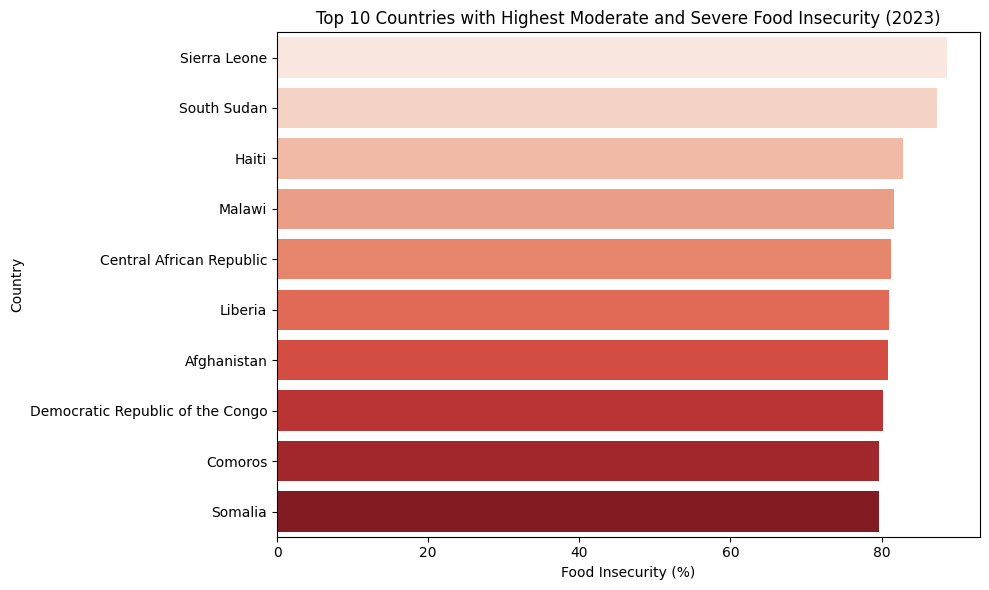

In [50]:
top10 = df[df['Year'] == 2023].nlargest(10, 'Moderate+Severe Food Insecurity (percent)')

plt.figure(figsize=(10, 6))
sns.barplot(
    x = 'Moderate+Severe Food Insecurity (percent)',
    y = 'Area',
    hue = 'Area',
    data = top10,
    palette = 'Reds',
    dodge = False
)
plt.title('Top 10 Countries with Highest Moderate and Severe Food Insecurity (2023)')
plt.xlabel('Food Insecurity (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## Global Food Insecurity Trend

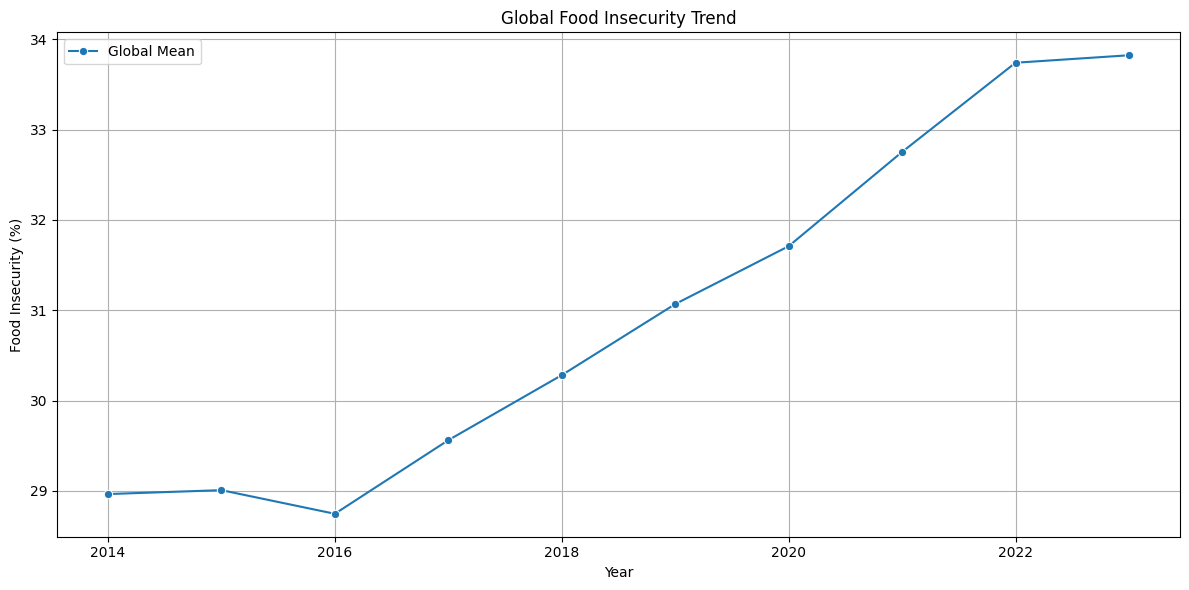

In [51]:
fi_mean = df.groupby('Year')['Moderate+Severe Food Insecurity (percent)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    x = 'Year',
    y = 'Moderate+Severe Food Insecurity (percent)',
    data = fi_mean,
    errorbar = None,
    marker = 'o',
    label = 'Global Mean'
)
plt.title('Global Food Insecurity Trend')
plt.xlabel('Year')
plt.ylabel('Food Insecurity (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Analysis**

Based on the trend, the food insecurity rates was drastically increased from 2017 to 2023.

## Food Insecurity Trends by Continents

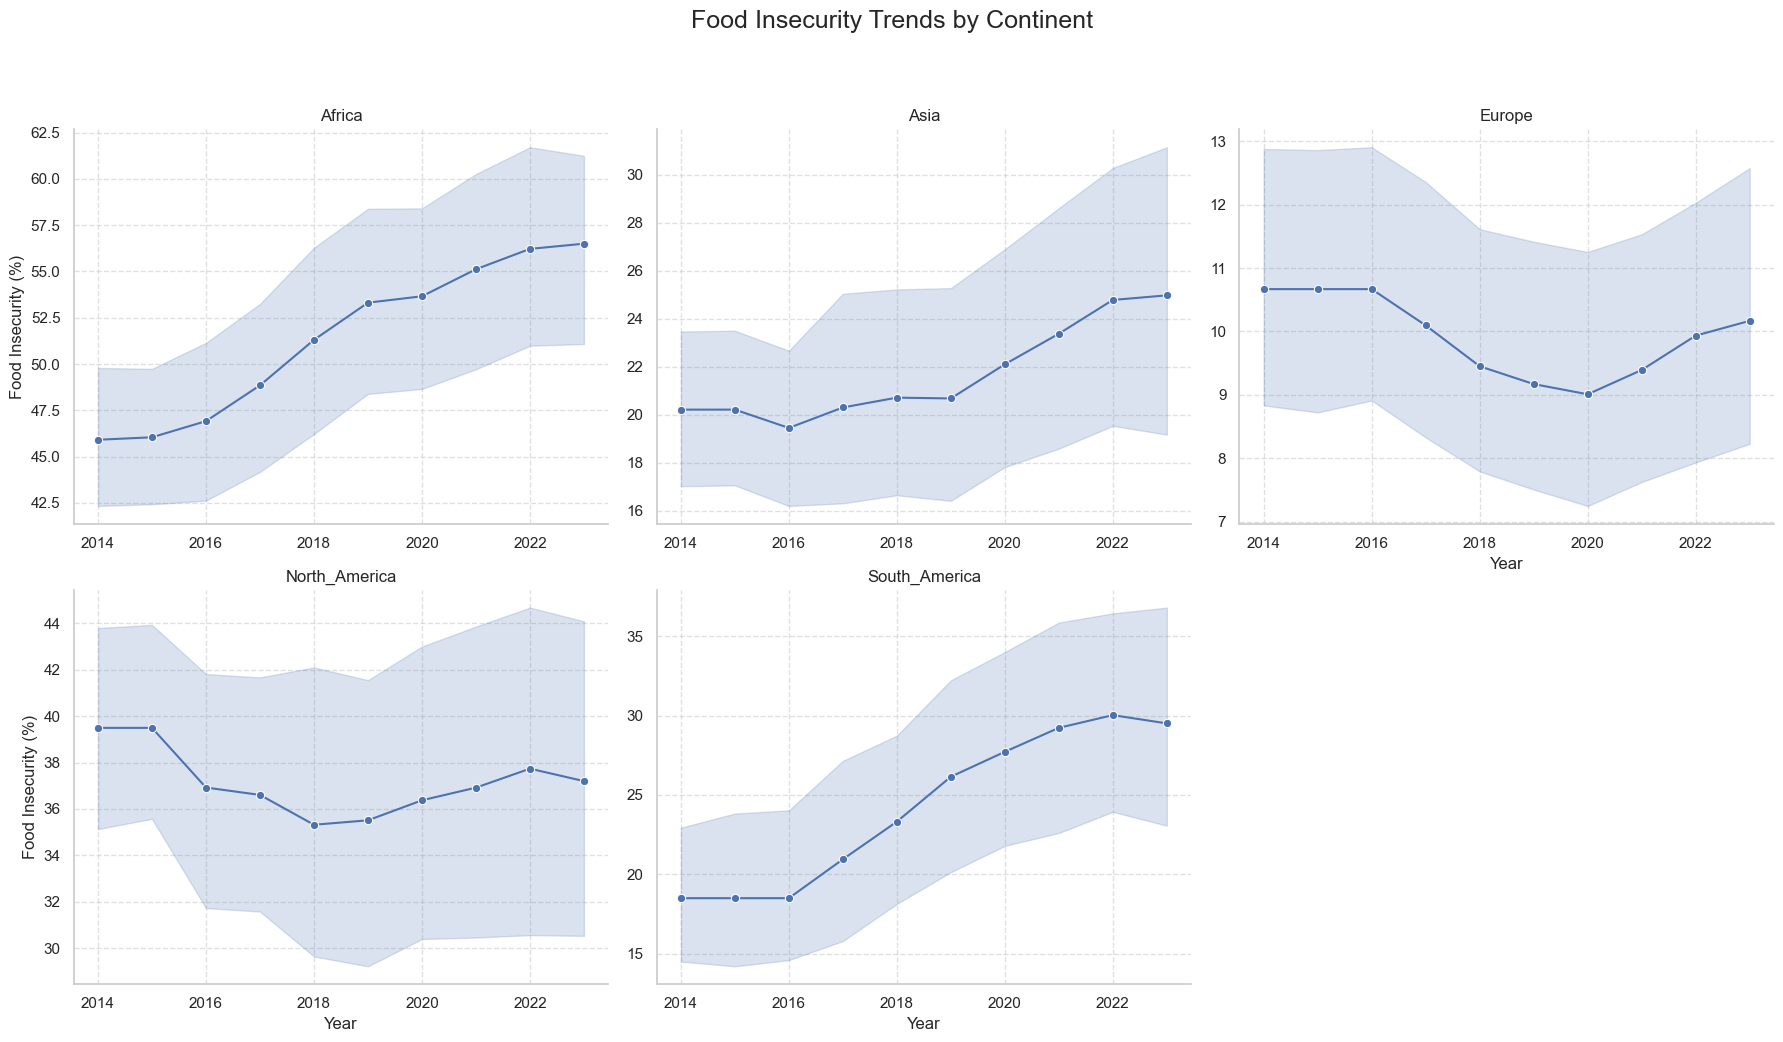

In [52]:
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(
    df,
    col='Continent',
    col_wrap=3,
    height=5,
    sharey=False,
    aspect=1.2,
    palette="Set2"
)
g.map(sns.lineplot, 'Year', 'Moderate+Severe Food Insecurity (percent)', marker='o')
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Food Insecurity (%)")

for ax in g.axes.flat:
    ax.tick_params(axis='x')
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.grid(True, linestyle='--', alpha=0.6)

g.fig.suptitle('Food Insecurity Trends by Continent', fontsize=18, y=1.04)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.tight_layout()

plt.show()

**Analysis**
1. Africa has the highest levels of food insecurity, with percentages ranging from 52% to 56%.
2. In Asia, food insecurity ranges between 17.5% and 27.5%.
3. Europe has the lowest reported food insecurity, between 9% and 11%.
4. North America shows relatively high food insecurity levels, ranging from 32.5% to 37.5%.
5. In South America, food insecurity varies between 15% and 30%.

 Africa records the highest food insecurity rate, whereas Europe has the lowest among all continents.

### Correlation between Food Insecurity and GDP Growth

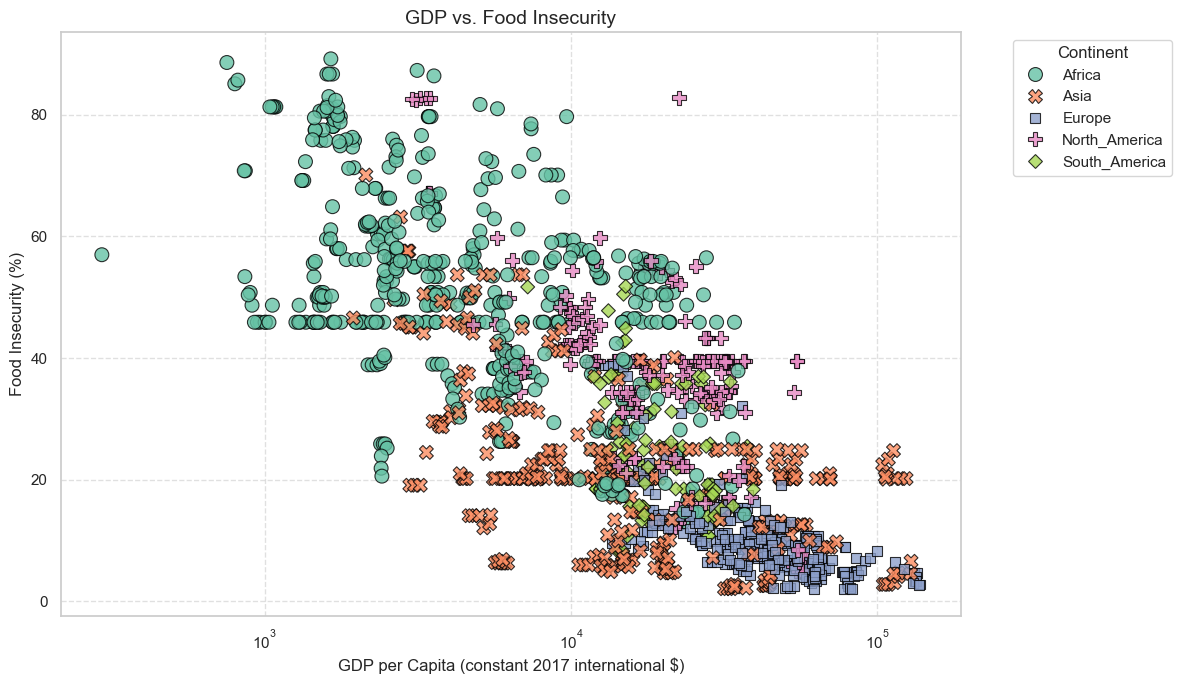

In [53]:
# Set Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    x='Gross domestic product per capita, PPP, (constant 2017 international $)',
    y='Moderate+Severe Food Insecurity (percent)',
    hue='Continent',
    data=df,
    palette='Set2',
    style='Continent',
    s=100,
    edgecolor='black',
    alpha=0.8
)

plt.xscale('log')
plt.title('GDP vs. Food Insecurity', fontsize=14)
plt.xlabel('GDP per Capita (constant 2017 international $)', fontsize=12)
plt.ylabel('Food Insecurity (%)', fontsize=12)
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Analysis**

- There is a negative correlation between GDP growth and food insecurity.
- Countries with higher GDP per capita tend to have lower food insecurity, especially those in Europe.
- Conversely, countries with lower GDP per capita, particularly in Africa, experience higher levels of food insecurity.
- Some countries have moderate GDP levels, but they still face high food insecurity rates due to other contributing factors such as inequality, conflict, or poor infrastructure.

### Top 5 Improving and Worsening Countries (Food Insecurity)

In [54]:
# Calculate change over time
trends_fi = df.groupby('Area')['Moderate+Severe Food Insecurity (percent)'].agg(['first', 'last'])
trends_fi['Change'] = trends_fi['last'] - trends_fi['first']

# Top improvements
improvements = trends_fi.nsmallest(5, 'Change')

# Top deteriorations
deteriorations = trends_fi.nlargest(5, 'Change')

print("Top 5 Improvements:")
print(improvements)
print("=" * 50)
print("Top 5 Deteriorations:")
print(deteriorations)

Top 5 Improvements:
              first  last  Change
Area                             
Canada         39.5   8.5   -31.0
South Africa   45.9  19.4   -26.5
Mali           45.9  20.0   -25.9
Bahamas        39.5  17.2   -22.3
Grenada        39.5  19.9   -19.6
Top 5 Deteriorations:
                          first  last  Change
Area                                         
South Sudan                45.9  87.3    41.4
Nigeria                    34.7  73.9    39.2
Afghanistan                45.1  80.9    35.8
Central African Republic   45.9  81.3    35.4
Mauritania                 26.3  61.2    34.9


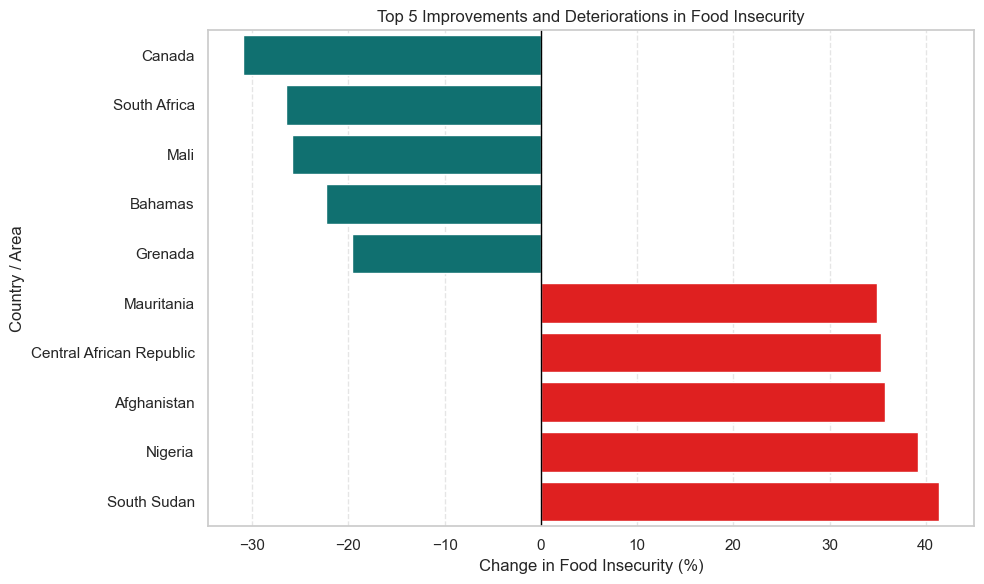

In [55]:
combined = pd.concat([improvements, deteriorations])
combined = combined.sort_values('Change')

colors = ['teal' if x < 0 else 'red' for x in combined['Change']]
combined['Area'] = combined.index

plt.figure(figsize=(10, 6))
sns.barplot(
    data=combined,
    y='Area',
    x='Change',
    hue='Area',
    palette=colors,
    dodge=False,
    legend=False
)

plt.axvline(0, color='black', linewidth=1)
plt.title('Top 5 Improvements and Deteriorations in Food Insecurity')
plt.xlabel('Change in Food Insecurity (%)')
plt.ylabel('Country / Area')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Analysis**

- Mongolia, Eritrea, Guinea, Burkina Faso, and Somalia showed significant improvement, as their food insecurity levels decreased over time, indicating better food availability and improved nutritional conditions.
- Conversely, Pakistan, Angola, Mauritania, Afghanistan, and Nigeria experienced increased food insecurity, which may reflect worsening socio-economic conditions, conflict, or limited access to food resources.

### Average Food Insecurity by Political Stability Level

C:\Users\Callum\AppData\Local\Temp\ipykernel_13420\1690347655.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Callum\AppData\Local\Temp\ipykernel_13420\1690347655.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




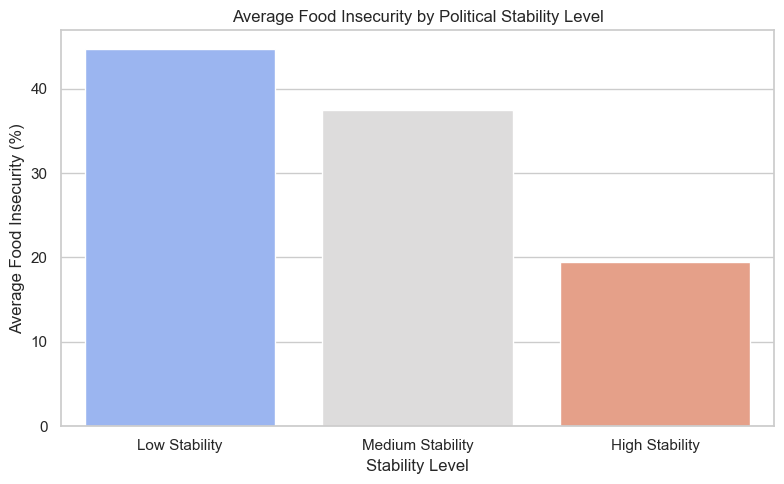

In [56]:
# Create categorical stability groups
df['Stability_Level'] = pd.cut(
    df['Political stability and absence of violence/terrorism (index)'],
    bins=[-3, -1, 0, 2],
    labels=['Low Stability', 'Medium Stability', 'High Stability']
)

# Group by stability level and calculate mean
avg_insecurity = df.groupby('Stability_Level')['Moderate+Severe Food Insecurity (percent)'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_insecurity,
    x='Stability_Level',
    y='Moderate+Severe Food Insecurity (percent)',
    palette='coolwarm'
)
plt.title('Average Food Insecurity by Political Stability Level')
plt.xlabel('Stability Level')
plt.ylabel('Average Food Insecurity (%)')
plt.tight_layout()
plt.show()

**Analysis**

1. Low stability countries tend to have the highest average levels of food insecurity (unstable politic, violence, instability may impact food supply chains, economic access to food and so forth)
2. Medium Stability Countries show moderate food insecurity, indicating some vulnerability but with more resilience or partial support systems in place.
3. High Stability Countries have the lowest levels of food insecurity on average, showing that politically stable environments likely support stronger food systems, better infrastructure, and more effective social safety nets.

### Global Per Capita Food Supply Variability

**metric that monitors the fluctuations in the average daily caloric supply accessible to individuals over a specific period.**

In [57]:
fig = px.choropleth(
    df,
    locations='Area',
    locationmode='country names',
    color='Per capita food supply variability (kcal/cap/day)',
    hover_name='Area',
    animation_frame='Year',
    color_continuous_scale='YlGnBu',
    title='Global Per Capita Food Supply Variability (kcal/cap/day)'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    coloraxis_colorbar=dict(
        title='Food Supply<br>Variability<br>(kcal/cap/day)'
    ),
    width=1000,
    height=600
)

fig.show()

### Food Supply Variability vs Food Insecurity

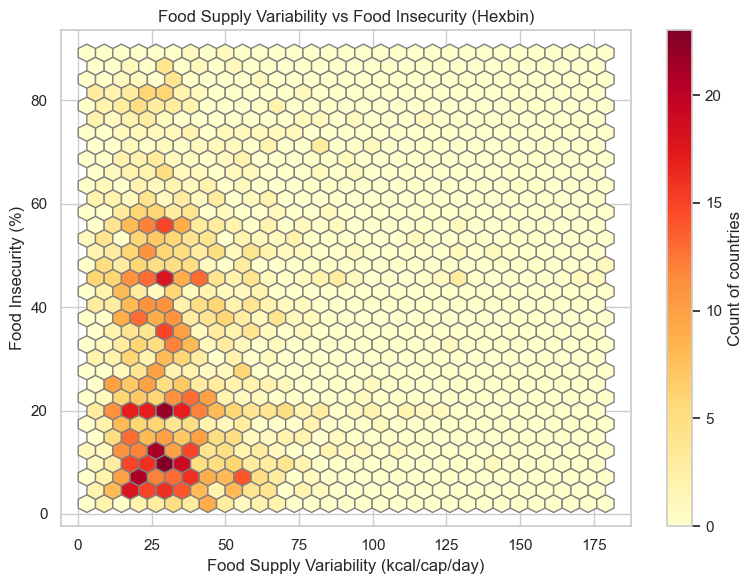

In [58]:
plt.figure(figsize=(8, 6))
plt.hexbin(
    df['Per capita food supply variability (kcal/cap/day)'],
    df['Moderate+Severe Food Insecurity (percent)'],
    gridsize=30, cmap='YlOrRd', edgecolors='grey'
)
plt.colorbar(label='Count of countries')
plt.title('Food Supply Variability vs Food Insecurity (Hexbin)')
plt.xlabel('Food Supply Variability (kcal/cap/day)')
plt.ylabel('Food Insecurity (%)')
plt.tight_layout()
plt.show()

**Analysis**

1. Most countries cluster where food supply variability is below 50 kcal/cap/day and food insecurity is below 25%, suggesting that stable food systems are generally associated with lower food insecurity.
2. There is a visible positive relationship: as food supply variability increases, food insecurity tends to rise. This implies that supply instability may be a key driver of food access issues.
3. Few countries show extremely low variability and high insecurity, suggesting other factors (e.g., conflict or poverty) might contribute in those edge cases.

### Dietary Energy Supply vs. Food Insecurity

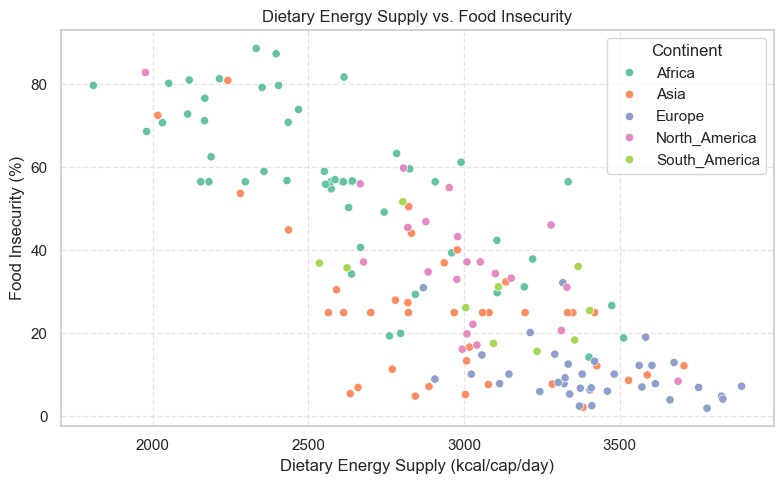

In [59]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df[df['Year'] == df['Year'].max()],
    x='Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
    y='Moderate+Severe Food Insecurity (percent)',
    hue='Continent',
    palette='Set2'
)
plt.title('Dietary Energy Supply vs. Food Insecurity')
plt.xlabel('Dietary Energy Supply (kcal/cap/day)')
plt.ylabel('Food Insecurity (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Analysis**
- The scatter plot shows a negative correlation between dietary energy supply and food insecurity rates.
- As dietary energy supply increases, the percentage of people facing food insecurity tends to decrease.

**Africa**  
Many African countries have low dietary enerygy supply (below 2500 kcal/cap/day) and high food security (> 40%). This may represents food supply issues and  structural food insecurity.

**Asia & North America & South America**  
Some countries have adequate energy supply but still face moderate food insecurity, indicating distribution or affordability challenges

**Europe**  
Most countries - high dietary energy supply (> 2800 kcal) and low food security (< 20%).

### Global Undernourishment

In [60]:
fig = px.choropleth(
    df,
    locations='Area',
    locationmode='country names',
    color='Prevalence of undernourishment (percent) (3-year average)',
    hover_name='Area',
    animation_frame='Year',
    color_continuous_scale='Blues',
    title='Global Undernourishment (%)',
    labels={'Prevalence of undernourishment (percent) (3-year average)': 'Undernourishment (%)'}
)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    width = 1000,
    height = 600
    )
fig.show()

### Top 10 Countries with Highest Undernourishment

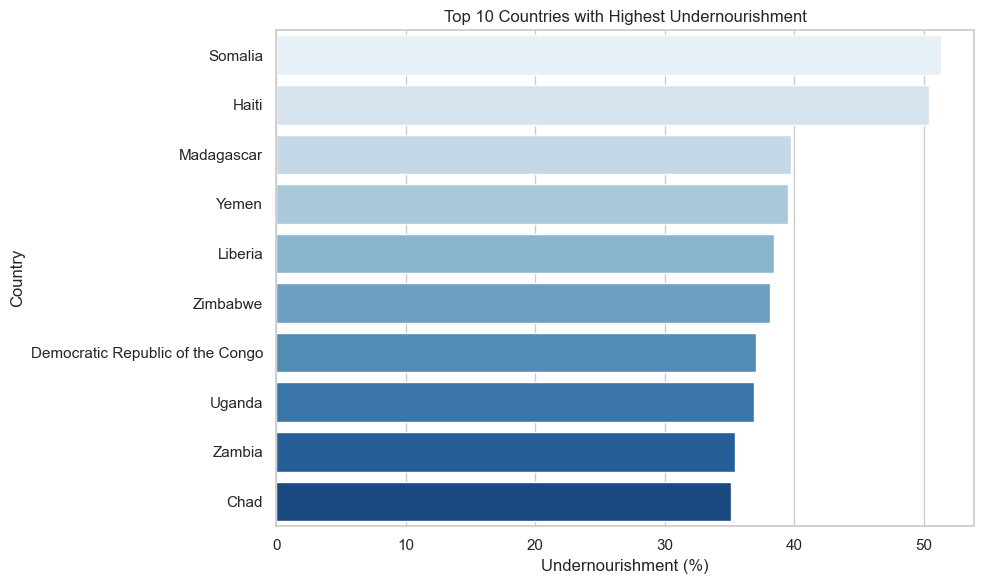

In [61]:
top10 = df[df['Year'] == 2023].nlargest(10, 'Prevalence of undernourishment (percent) (3-year average)')

plt.figure(figsize=(10, 6))
sns.barplot(
    x = 'Prevalence of undernourishment (percent) (3-year average)',
    y = 'Area',
    hue = 'Area',
    data = top10,
    palette = 'Blues',
    dodge = False
)
plt.title('Top 10 Countries with Highest Undernourishment')
plt.xlabel('Undernourishment (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Undernourishment Trend

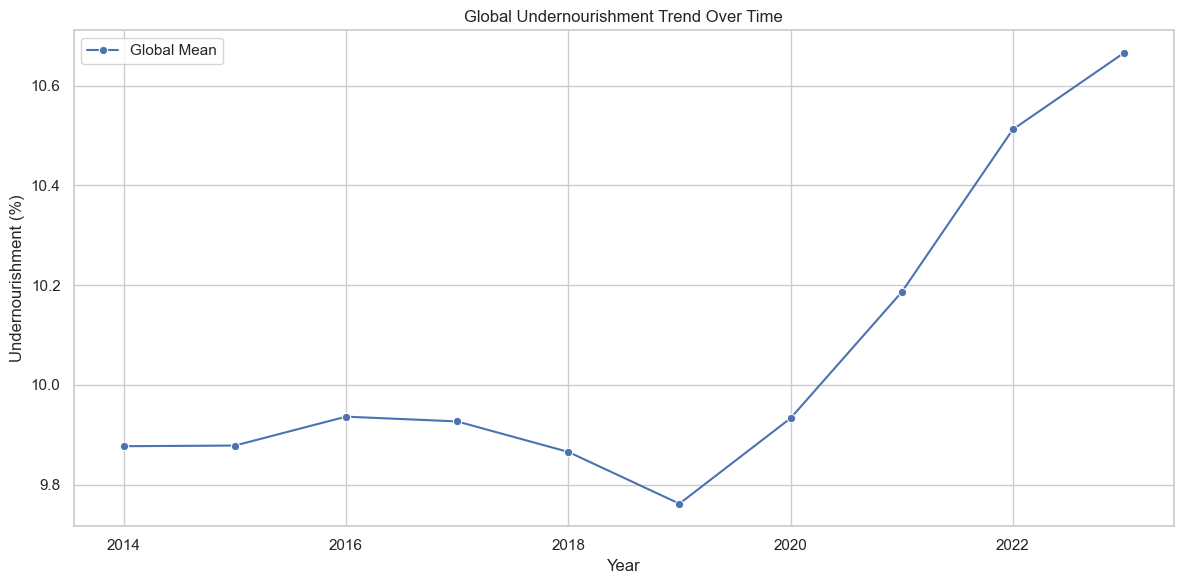

In [62]:
global_mean = df.groupby('Year')['Prevalence of undernourishment (percent) (3-year average)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    x = 'Year',
    y = 'Prevalence of undernourishment (percent) (3-year average)',
    data = global_mean,
    errorbar = None,
    marker = 'o',
    label = 'Global Mean'
)
plt.title('Global Undernourishment Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Undernourishment (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Analysis**

The global undernourishment rate showed a slight increase from 2014 to 2016, followed by a gradual decline until 2019. However, from 2019 to 2023, the percentage of undernourishment rose sharply.

### Undernourishment Trends by Continents

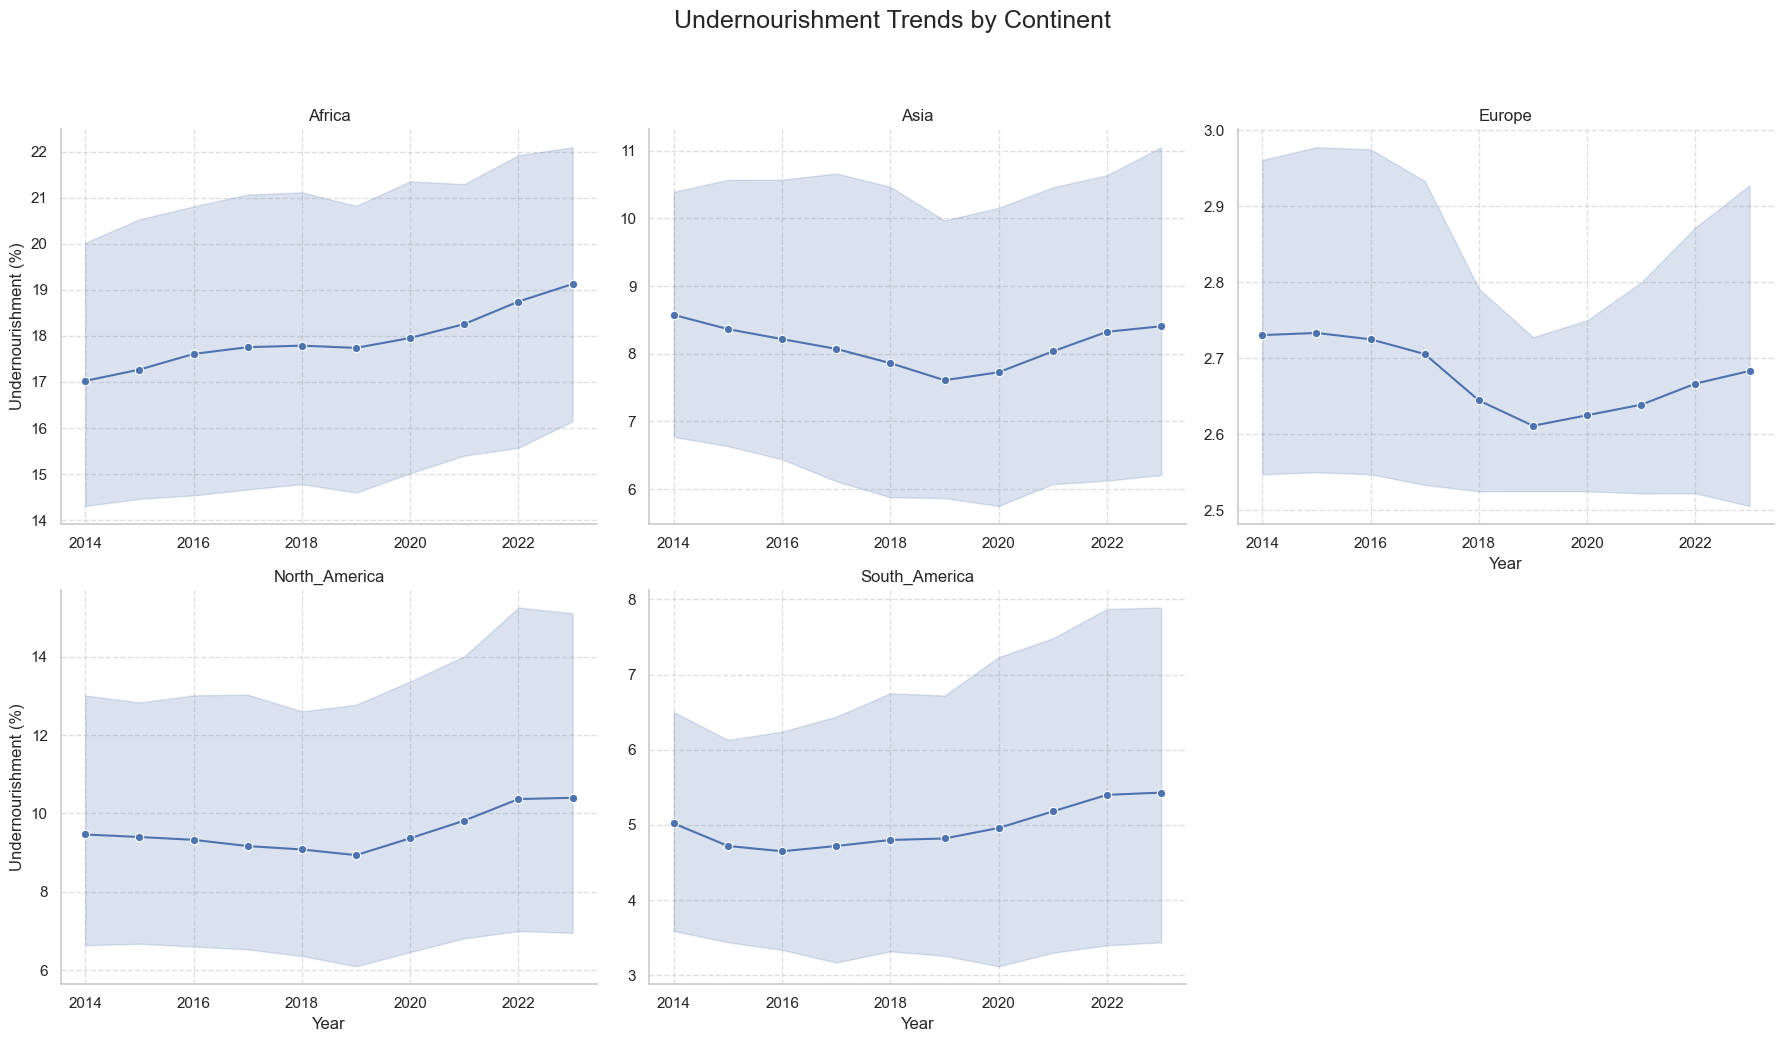

In [63]:
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(
    df,
    col='Continent',
    col_wrap=3,
    height=5,
    sharey=False,
    aspect=1.2,
    palette="Set2"
)
g.map(sns.lineplot, 'Year', 'Prevalence of undernourishment (percent) (3-year average)', marker='o')
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Undernourishment (%)")

for ax in g.axes.flat:
    ax.tick_params(axis='x')
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.grid(True, linestyle='--', alpha=0.6)

g.fig.suptitle('Undernourishment Trends by Continent', fontsize=18, y=1.04)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.tight_layout()

plt.show()

**Analysis**
1. The percentage of undernourishment is between 17% and 19% in Africa. 
2. Asia's undernourishment percent is between 7% and 9%. 
3. The percentage of undernourishment is between 2.6% and 3.0% in Europe.
4. The percentage of undernourishment is between 8% and 10% in North America.
5. The percentage of undernourishment is between 4% and 6% in South America. 

Africa has the highest percentage of undernourishment while Europe has the lowest undernourishment percent. 

## Correlation between undernourishment and GDP Growth

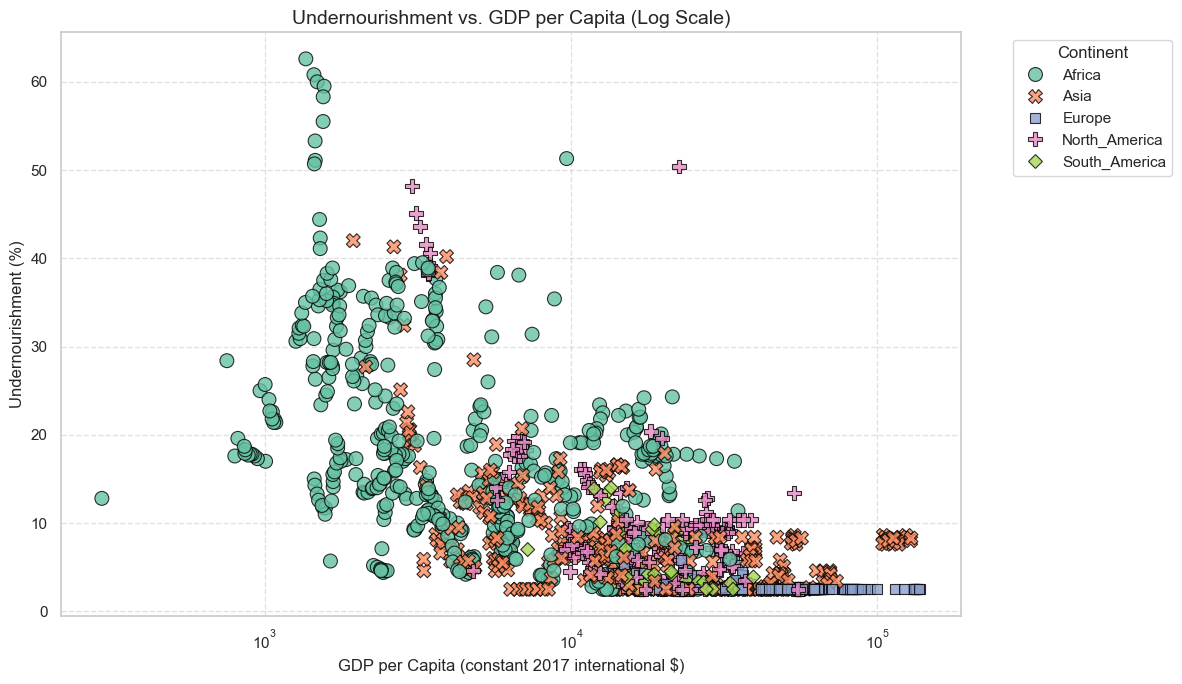

In [64]:
# Set Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    x='Gross domestic product per capita, PPP, (constant 2017 international $)',
    y='Prevalence of undernourishment (percent) (3-year average)',
    hue='Continent',
    data=df,
    palette='Set2',
    style='Continent',
    s=100,
    edgecolor='black',
    alpha=0.8
)

plt.xscale('log')  # Better handle GDP skew
plt.title('Undernourishment vs. GDP per Capita (Log Scale)', fontsize=14)
plt.xlabel('GDP per Capita (constant 2017 international $)', fontsize=12)
plt.ylabel('Undernourishment (%)', fontsize=12)
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Analysis**

- There is a negative correlation between GDP per capita and undernourishment rates.
- Countries with high GDP per capita tend to have lower undernourishment, especially Europe countries.
- Conversely, countries with low GDP per capita, particularly in Africa, experience higher levels of undernourishment.
- Some countries have moderate GDP levels, but they still face high undernourishment rates.


## Top 5 Improving and Worsening Countries (Undernourishment)

In [65]:
# Calculate change over time
trends = df.groupby('Area')['Prevalence of undernourishment (percent) (3-year average)'].agg(['first', 'last'])
trends['Change'] = trends['last'] - trends['first']

# Top improvements
improvements = trends.nsmallest(5, 'Change')

# Top deteriorations
deteriorations = trends.nlargest(5, 'Change')

print("Top 5 Improvements:")
print(improvements)
print("=" * 50)
print("Top 5 Deteriorations:")
print(deteriorations)

Top 5 Improvements:
            first  last  Change
Area                           
Tajikistan   20.6   8.7   -11.9
Somalia      62.6  51.3   -11.3
Mongolia     12.0   2.5    -9.5
Togo         19.6  12.8    -6.8
Senegal      10.9   4.6    -6.3
Top 5 Deteriorations:
            first  last  Change
Area                           
Kenya        18.7  34.5    15.8
Uganda       24.4  36.9    12.5
Madagascar   27.8  39.7    11.9
Jordan        6.3  17.9    11.6
Chad         23.7  35.1    11.4


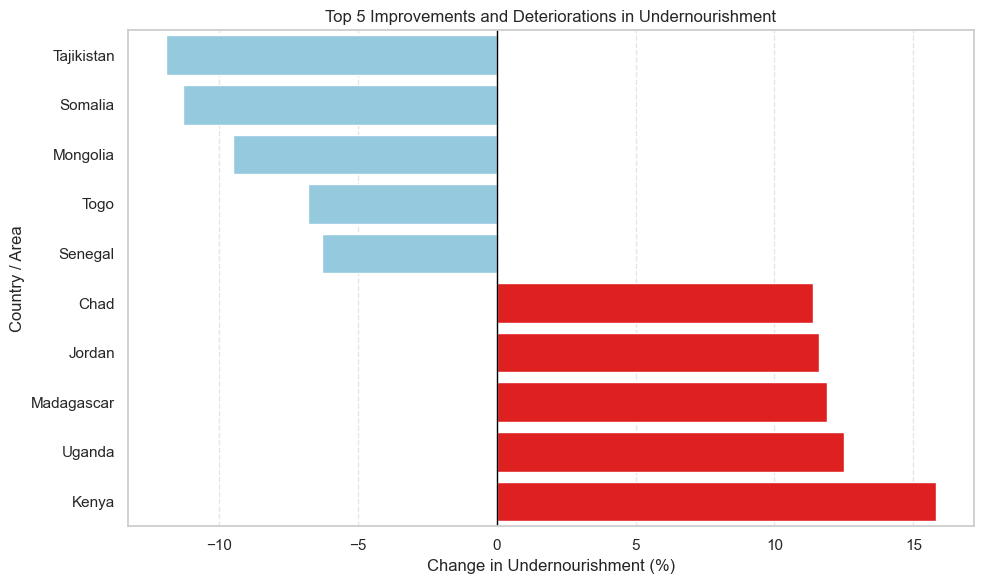

In [66]:
combined = pd.concat([improvements, deteriorations])
combined = combined.sort_values('Change')

colors = ['skyblue' if x < 0 else 'red' for x in combined['Change']]
combined['Area'] = combined.index

plt.figure(figsize=(10, 6))
sns.barplot(
    data=combined,
    y='Area',
    x='Change',
    hue='Area',
    palette=colors,
    dodge=False,
    legend=False
)

plt.axvline(0, color='black', linewidth=1)
plt.title('Top 5 Improvements and Deteriorations in Undernourishment')
plt.xlabel('Change in Undernourishment (%)')
plt.ylabel('Country / Area')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Analysis**

- Tajikistan, Eritrea, Somalia, Mongolia, and Burundi showed significant improvement, as their undernourishment rates decreased over time, indicating better food availability and nutrition conditions.
- Conversely, Chad, Jordan, Madagascar, Uganda, and Kenya experienced deterioration, with undernourishment rates increasing, which may reflect worsening food insecurity or socio-economic challenges.

### Caloric Loss vs. Food Insecurity

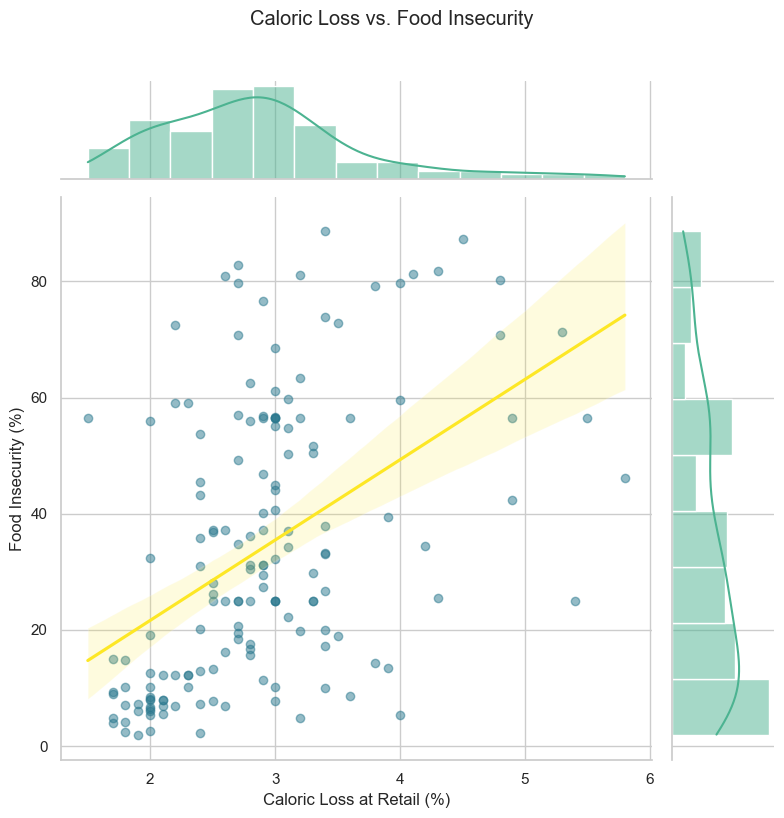

In [67]:
sns.jointplot(
    data=df[df['Year'] == df['Year'].max()],
    x='Incidence of caloric losses at retail distribution level (percent)',
    y='Moderate+Severe Food Insecurity (percent)',
    kind='reg',
    height=8,
    marginal_kws={'kde': True, 'color': '#4CB391'},
    scatter_kws={'alpha': 0.5, 'color': '#2A788E'},
    line_kws={'color': '#FDE725'}
)
plt.suptitle('Caloric Loss vs. Food Insecurity', y=1.02)
plt.xlabel('Caloric Loss at Retail (%)')
plt.ylabel('Food Insecurity (%)')
plt.tight_layout()
plt.show()

**Analysis**
1. The graph shows the positive correlation, indicating the higher the retail losses, the higher the food insecurity. (reason: reduced effective supply)

- High loss and low insecurity: efficient redistribution (e.g., food banks in wealthy nations).
- Low loss and high insecurity: non-supply issues (e.g., poverty, conflict).

### Average Caloric Loss at Retail by Continent

C:\Users\Callum\AppData\Local\Temp\ipykernel_13420\2319893993.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




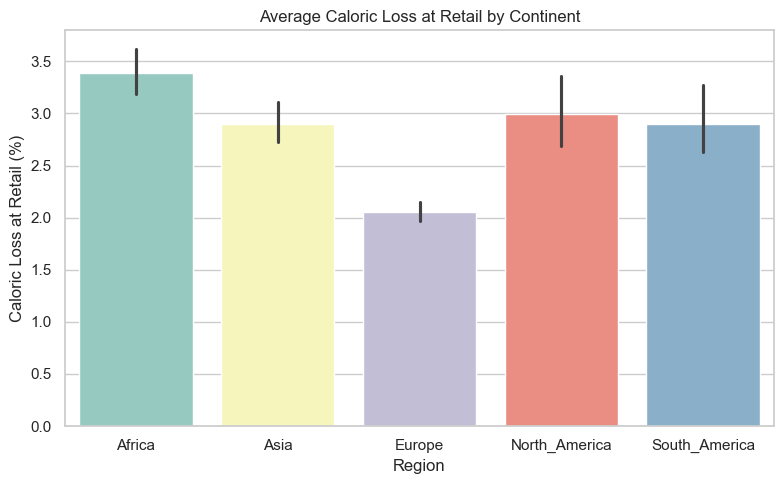

In [68]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df[df['Year'] == df['Year'].max()],
    x='Continent',
    y='Incidence of caloric losses at retail distribution level (percent)',
    palette='Set3'
)
plt.title('Average Caloric Loss at Retail by Continent')
plt.xlabel('Region')
plt.ylabel('Caloric Loss at Retail (%)')
plt.tight_layout()
plt.show()

**Analysis**

The rank of caloric loss at retail distribution level: Africa, North America, Asia, South America and Europe

### Top/Bottom 10 Countries by Caloric Loss at Retail (with Food Insecurity Context)

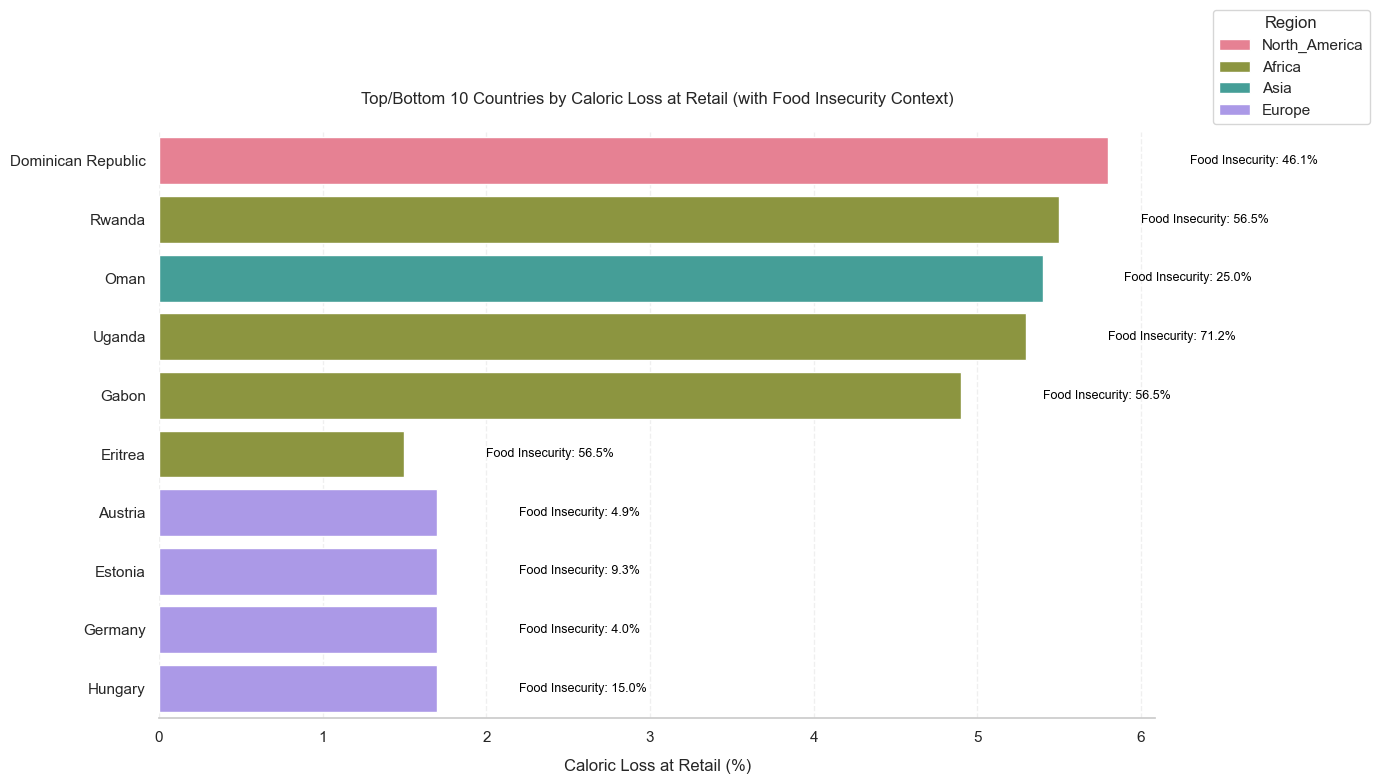

In [69]:
# Prepare data
latest = df[df['Year'] == df['Year'].max()]
top10 = latest.nlargest(5, 'Incidence of caloric losses at retail distribution level (percent)')
bottom10 = latest.nsmallest(5, 'Incidence of caloric losses at retail distribution level (percent)')
combined = pd.concat([top10, bottom10])

# Create figure
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=combined,
    y='Area',
    x='Incidence of caloric losses at retail distribution level (percent)',
    hue='Continent',
    palette='husl',
    dodge=False
)

# Add food insecurity labels
for i, (_, row) in enumerate(combined.iterrows()):
    ax.text(
        row['Incidence of caloric losses at retail distribution level (percent)'] + 0.5,  # X-position
        i,  # Y-position (bar index)
        f"Food Insecurity: {row['Moderate+Severe Food Insecurity (percent)']:.1f}%",
        ha='left',
        va='center',
        fontsize=9,
        color='black'
    )

# Customize
plt.title('Top/Bottom 10 Countries by Caloric Loss at Retail (with Food Insecurity Context)', pad=20)
plt.xlabel('Caloric Loss at Retail (%)', labelpad=10)
plt.ylabel('')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='best')
plt.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine(left=True)
plt.tight_layout()
plt.show()

**Analysis**

**Top 5 (High caloric loss at retail)**  
Dominican Republic, Rwanda, Oman, Uganda, Gabon

**Bottom 5 (Low caloric loss at retail)**  
Eritrea, Austria, Estonia, Germany, Hungary

### Global Obesity Trend

In [70]:
# Filter to latest year
latest = df[df['Year'] == df['Year'].max()]

fig = px.choropleth(
    df,
    locations='Area',
    locationmode='country names',
    color='Prevalence of obesity in the adult population (18 years and older) (percent)',
    hover_name='Area',
    animation_frame='Year',
    color_continuous_scale='Plasma',
    title='Global Obesity Prevalence (Adults 18+) Over Time'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    width=1000,
    height=600,
    coloraxis_colorbar=dict(title='Obesity (%)')
)

fig.show()


### Food Insecurity & Undernourishment vs Obesity

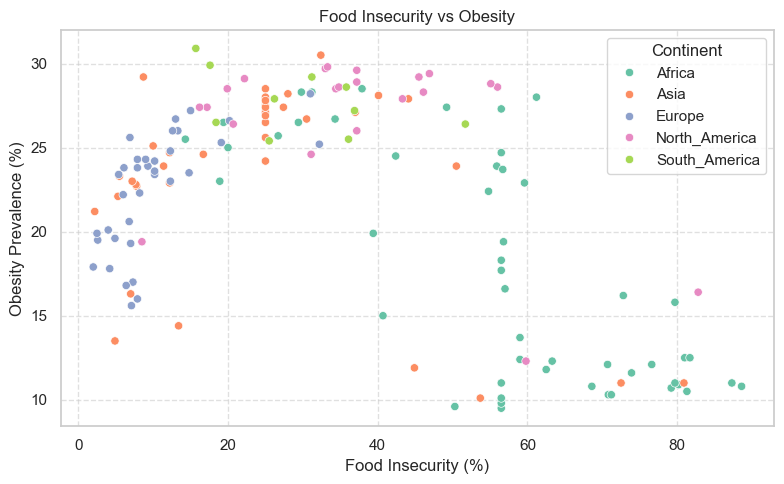

In [71]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df[df['Year'] == df['Year'].max()],
    x='Moderate+Severe Food Insecurity (percent)',
    y='Prevalence of obesity in the adult population (18 years and older) (percent)',
    hue='Continent',
    palette='Set2'
)
plt.title('Food Insecurity vs Obesity')
plt.xlabel('Food Insecurity (%)')
plt.ylabel('Obesity Prevalence (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


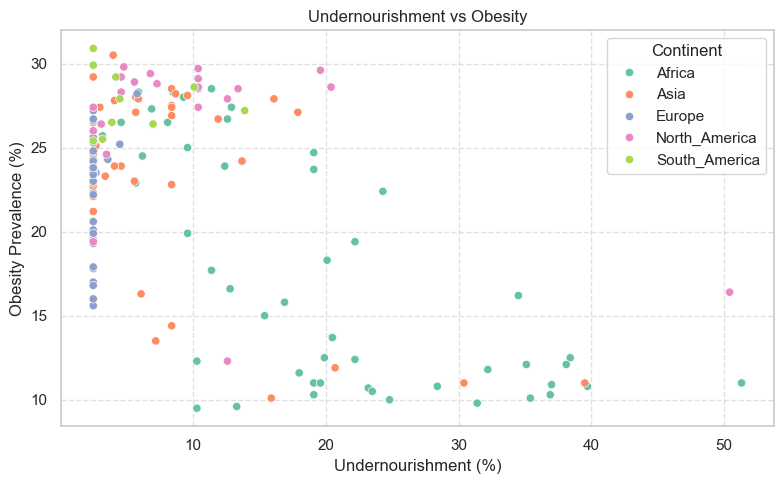

In [72]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df[df['Year'] == df['Year'].max()],
    x='Prevalence of undernourishment (percent) (3-year average)',
    y='Prevalence of obesity in the adult population (18 years and older) (percent)',
    hue='Continent',
    palette='Set2'
)
plt.title('Undernourishment vs Obesity')
plt.xlabel('Undernourishment (%)')
plt.ylabel('Obesity Prevalence (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Analysis**

Low-to middle income countries: High food insecurity, low obesity and low undernourishment.  
High income countries: low food insecurity, high obesity and low undernourishment.


### Obesity Prevalence Trends by Region

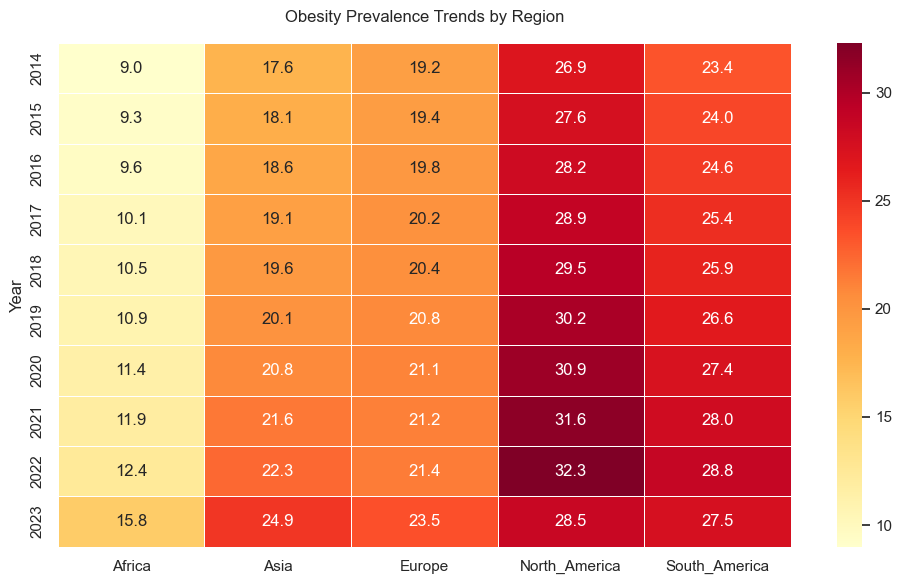

In [73]:
# Pivot for heatmap (Years vs Continents)
heatmap_data = df.pivot_table(
    index='Year',
    columns='Continent',
    values='Prevalence of obesity in the adult population (18 years and older) (percent)',
    aggfunc='median'
)

plt.figure(figsize=(10,6))
sns.heatmap(
    heatmap_data,
    cmap='YlOrRd',
    annot=True,
    fmt='.1f',
    linewidths=0.5
)

plt.title('Obesity Prevalence Trends by Region', pad=15)
plt.xlabel('')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

### Top 5 Countries with Highest Exclusive Breastfeeding

C:\Users\Callum\AppData\Local\Temp\ipykernel_13420\42950558.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




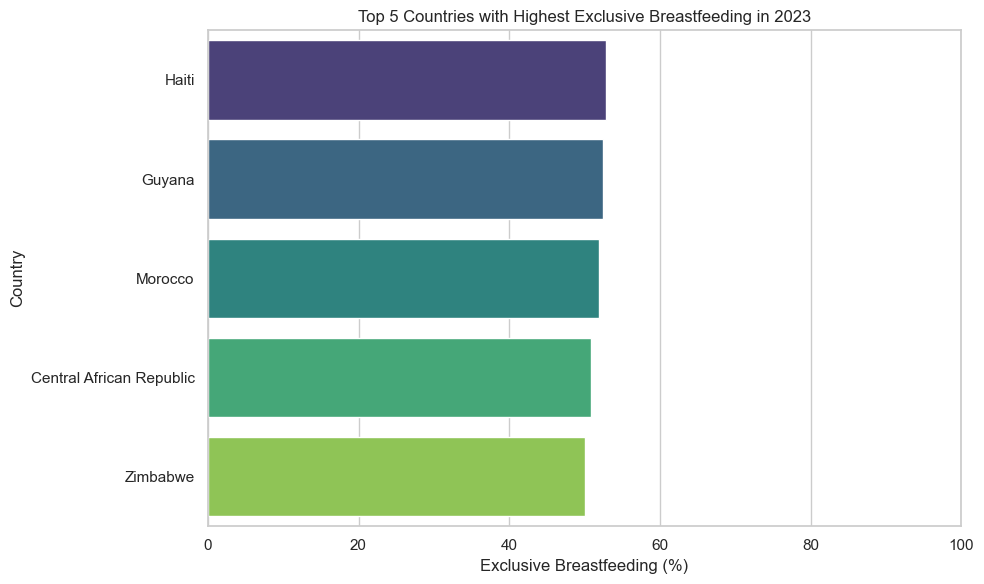

In [74]:
# Filter latest year
latest_year = df['Year'].max()
latest = df[df['Year'] == latest_year]

# Get top 5 countries
top5_breastfeeding = latest.nlargest(
    5, 'Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent)'
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top5_breastfeeding,
    x='Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent)',
    y='Area',
    palette='viridis'
)
plt.title(f'Top 5 Countries with Highest Exclusive Breastfeeding in {latest_year}')
plt.xlabel('Exclusive Breastfeeding (%)')
plt.ylabel('Country')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()


# 4. Clustering Model

In [75]:
df = pd.read_csv(Final_Cleaned)

In [76]:
food_security_vars = [
    'Prevalence of undernourishment (percent) (3-year average)',
    'Moderate+Severe Food Insecurity (percent)', 
    'Severe Food Insecurity (percent)',
    'Percentage of children under 5 years affected by wasting (percent)',
    'Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)',
    'Average dietary energy requirement (kcal/cap/day)',
    'Average protein supply (g/cap/day) (3-year average)',
    'Average supply of protein of animal origin (g/cap/day) (3-year average)',
    'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
    'Per capita food supply variability (kcal/cap/day)'
]

In [77]:
# Get latest year data
latest_year = df['Year'].max()
df_latest = df[df['Year'] == latest_year].copy()

In [78]:
# Create correlation matrix
correlation_matrix = df_latest[food_security_vars].corr()

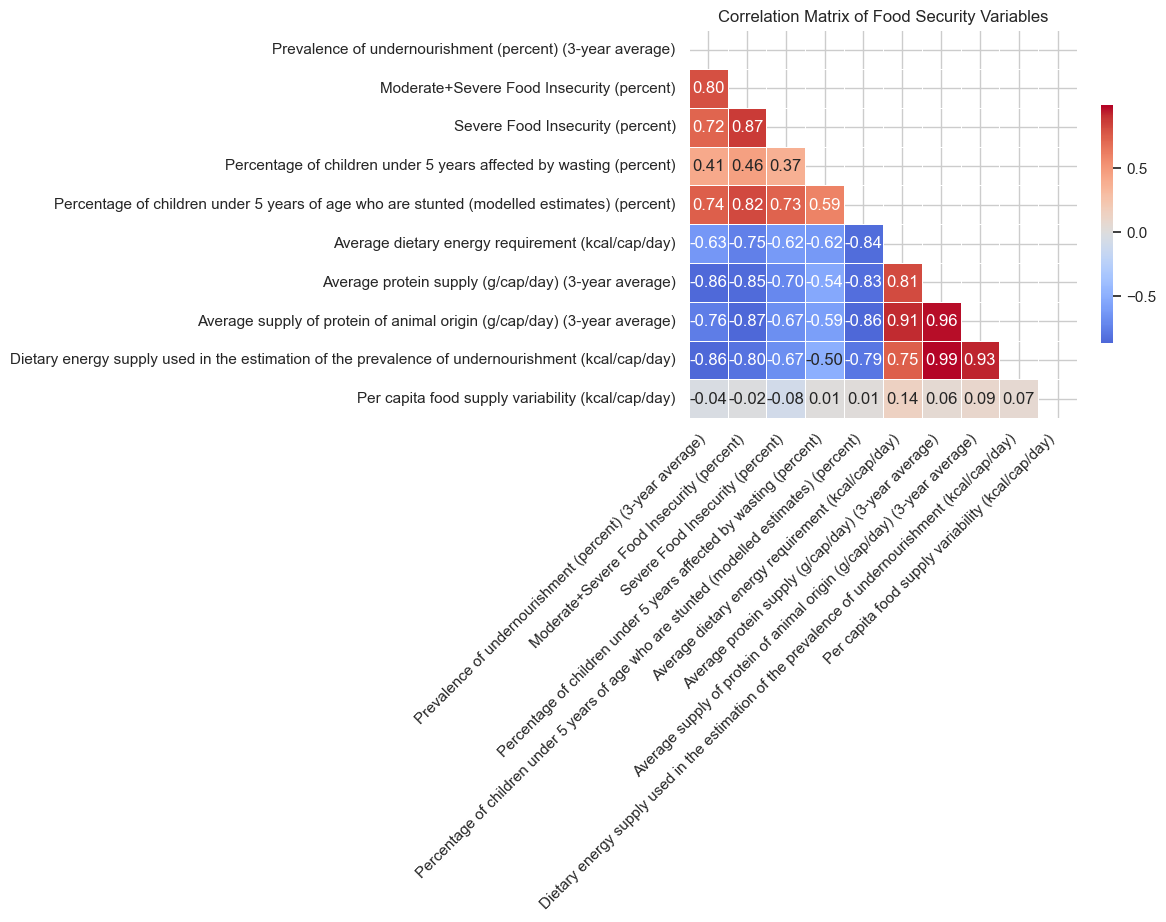

In [79]:
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5}, fmt='.2f')
plt.title('Correlation Matrix of Food Security Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [80]:
# Find highly correlated pairs (>0.7 or <-0.7)
print("=== HIGHLY CORRELATED VARIABLE PAIRS (|correlation| > 0.7) ===")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            high_corr_pairs.append((var1, var2, corr_value))
            print(f"{corr_value:.3f}: {var1[:30]}... vs {var2[:30]}...")

=== HIGHLY CORRELATED VARIABLE PAIRS (|correlation| > 0.7) ===
0.801: Prevalence of undernourishment... vs Moderate+Severe Food Insecurit...
0.718: Prevalence of undernourishment... vs Severe Food Insecurity (percen...
0.739: Prevalence of undernourishment... vs Percentage of children under 5...
-0.858: Prevalence of undernourishment... vs Average protein supply (g/cap/...
-0.764: Prevalence of undernourishment... vs Average supply of protein of a...
-0.859: Prevalence of undernourishment... vs Dietary energy supply used in ...
0.874: Moderate+Severe Food Insecurit... vs Severe Food Insecurity (percen...
0.825: Moderate+Severe Food Insecurit... vs Percentage of children under 5...
-0.745: Moderate+Severe Food Insecurit... vs Average dietary energy require...
-0.849: Moderate+Severe Food Insecurit... vs Average protein supply (g/cap/...
-0.866: Moderate+Severe Food Insecurit... vs Average supply of protein of a...
-0.802: Moderate+Severe Food Insecurit... vs Dietary energy supply used i

In [81]:
recommended_vars = [
    'Prevalence of undernourishment (percent) (3-year average)',  # Access dimension
    'Moderate+Severe Food Insecurity (percent)',  # Access dimension  
    'Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)',  # Utilization dimension
    'Average protein supply (g/cap/day) (3-year average)',  # Availability dimension
    'Per capita food supply variability (kcal/cap/day)'  # Stability dimension
]

print(f"\nRecommended variables for clustering ({len(recommended_vars)}):")
for i, var in enumerate(recommended_vars, 1):
    print(f"{i}. {var}")


Recommended variables for clustering (5):
1. Prevalence of undernourishment (percent) (3-year average)
2. Moderate+Severe Food Insecurity (percent)
3. Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)
4. Average protein supply (g/cap/day) (3-year average)
5. Per capita food supply variability (kcal/cap/day)


In [82]:
# Prepare data for clustering
df_cluster = df_latest[['Area'] + recommended_vars].copy()

In [83]:
# Separate country names and feature data
countries = df_cluster['Area'].values
X = df_cluster[recommended_vars].values

In [84]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

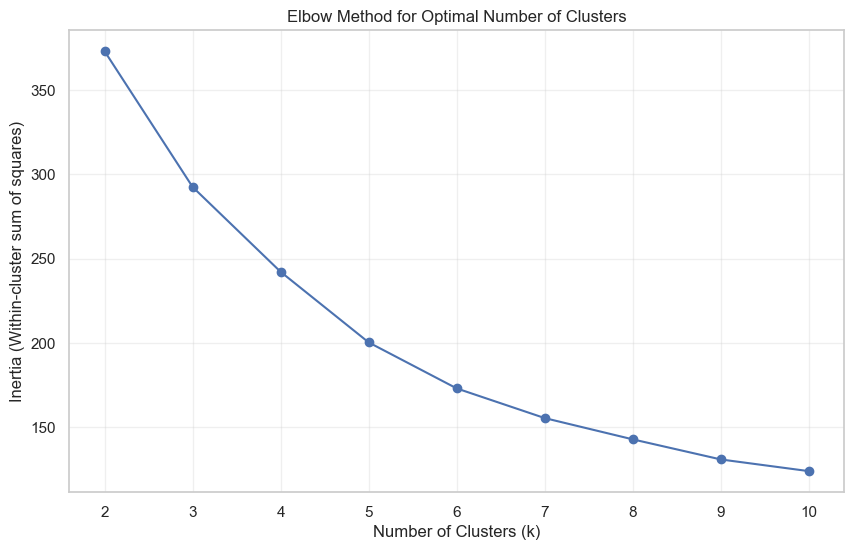

In [85]:
# Determine optimal number of clusters using Elbow Method
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True, alpha=0.3)
plt.show()

In [86]:
#The rate of decrease slows significantly after k=4, so final clustering with k=4
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to dataframe
df_cluster['Cluster'] = cluster_labels

In [87]:
# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

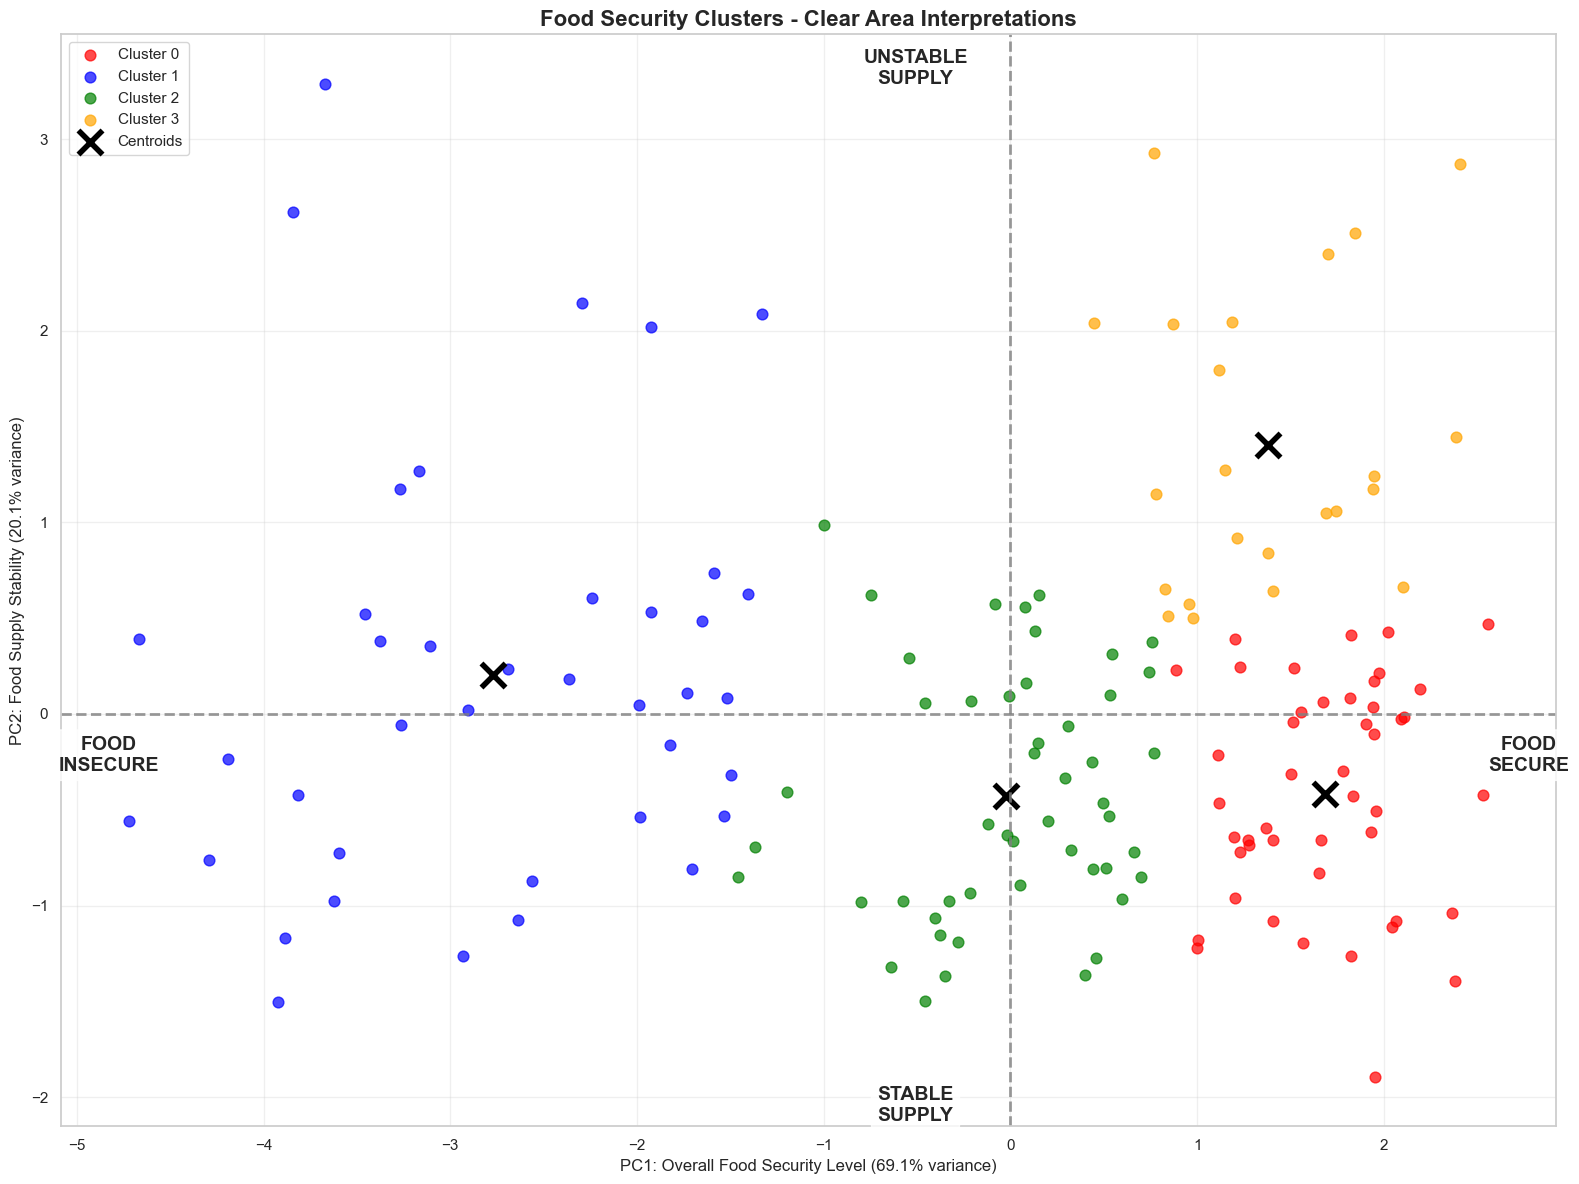

In [88]:
#visualization plot

plt.figure(figsize=(16, 12))

colors = ['red', 'blue', 'green', 'orange']

for cluster in range(optimal_k):
    mask = cluster_labels == cluster
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=colors[cluster], label=f'Cluster {cluster}', 
               alpha=0.7, s=60)

centers_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
           c='black', marker='x', s=300, linewidths=4, label='Centroids')

plt.axhline(y=0, color='gray', linestyle='--', alpha=0.8, linewidth=2)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.8, linewidth=2)

xlim = plt.xlim()
ylim = plt.ylim()

# Clear axis direction labels
plt.text(xlim[1]*0.95, ylim[0]*0.1, 'FOOD\nSECURE', ha='center', va='center', 
         fontsize=14, weight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
plt.text(xlim[0]*0.95, ylim[0]*0.1, 'FOOD\nINSECURE', ha='center', va='center', 
         fontsize=14, weight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
plt.text(xlim[0]*0.1, ylim[1]*0.95, 'UNSTABLE\nSUPPLY', ha='center', va='center', 
         fontsize=14, weight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
plt.text(xlim[0]*0.1, ylim[0]*0.95, 'STABLE\nSUPPLY', ha='center', va='center', 
         fontsize=14, weight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
plt.xlabel(f'PC1: Overall Food Security Level ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2: Food Supply Stability ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('Food Security Clusters - Clear Area Interpretations', fontsize=16, weight='bold')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Cluster Interpretation

### **Cluster 0 (Red) - "Significant Food Insecure & Volatile" Countries**
- **Location**: Left-center, spanning both quadrants
- **Characteristics**: Low food security + Variable supply stability
- **Profile**: Countries facing multiple food security challenges with significantly inconsistent supply patterns
- **Status**: **POOR** - may benefit from targeted nutrition interventions 

### **Cluster 1 (Blue) - "Food Secure & Stable" Countries**
- **Location**: Bottom-right quadrant
- **Characteristics**: High food security + Stable supply
- **Profile**: Countries with adequate protein supply, low undernourishment, low food insecurity, and consistent food supply
- **Typical Examples**: Developed countries with robust food systems
- **Status**: **OPTIMAL** - Best performing group

### **Cluster 2 (Green) - "Food Secure but Volatile" Countries**
- **Location**: Top-right quadrant
- **Characteristics**: High food security + Unstable supply
- **Profile**: Generally food secure but experience supply variability (possibly due to climate, trade dependencies, or economic fluctuations)
- **Status**: **GOOD** but with vulnerability to supply shocks

### **Cluster 3 (Orange) - "Food Insecure but Volatile" Countries**
- **Location**: Bottom-left quadrant
- **Characteristics**: Low food security + Variable supply stability
- **Profile**: Consistently poor food security indicators but though inadequate supply patterns
- **Status**: **CRITICAL** - highest risk group requiring urgent intervention

## Key Findings

### **1. Clear Separation of Food Security Levels**
- The **horizontal axis (PC1)** effectively separates food secure (right) from food insecure (left) countries
- **69.3% of variance** explained by overall food security level confirms this is the primary distinguishing factor

### **2. Supply Stability as Secondary Factor**
- The **vertical axis (PC2)** captures supply variability as an independent dimension
- **20.0% of variance** explained by supply stability shows this is a distinct and important characteristic

In [89]:
# Count countries per cluster
cluster_counts = df_cluster['Cluster'].value_counts().sort_index()
print(f"\nCountries per cluster:")
for cluster in range(optimal_k):
    count = cluster_counts[cluster]
    percentage = (count/len(df_cluster)*100)
    print(f"Cluster {cluster}: {count} countries ({percentage:.1f}%)")

# Display mean values for each cluster
cluster_analysis = df_cluster.groupby('Cluster')[recommended_vars].agg(['mean', 'std']).round(2)

print("Mean values by cluster:")
for cluster in range(optimal_k):
    print(f"\n--- CLUSTER {cluster} ---")
    for var in recommended_vars:
        mean_val = cluster_analysis.loc[cluster, (var, 'mean')]
        print(f"{var[:40]}...: {mean_val}")


Countries per cluster:
Cluster 0: 46 countries (29.3%)
Cluster 1: 39 countries (24.8%)
Cluster 2: 49 countries (31.2%)
Cluster 3: 23 countries (14.6%)
Mean values by cluster:

--- CLUSTER 0 ---
Prevalence of undernourishment (percent)...: 2.93
Moderate+Severe Food Insecurity (percent...: 11.98
Percentage of children under 5 years of ...: 5.96
Average protein supply (g/cap/day) (3-ye...: 106.01
Per capita food supply variability (kcal...: 26.0

--- CLUSTER 1 ---
Prevalence of undernourishment (percent)...: 25.64
Moderate+Severe Food Insecurity (percent...: 66.89
Percentage of children under 5 years of ...: 25.7
Average protein supply (g/cap/day) (3-ye...: 61.18
Per capita food supply variability (kcal...: 34.16

--- CLUSTER 2 ---
Prevalence of undernourishment (percent)...: 8.99
Moderate+Severe Food Insecurity (percent...: 35.14
Percentage of children under 5 years of ...: 12.6
Average protein supply (g/cap/day) (3-ye...: 84.08
Per capita food supply variability (kcal...: 25.4

--- CLU

In [90]:
#showing all countries in each cluster
for cluster in range(optimal_k):
    countries_in_cluster = df_cluster[df_cluster['Cluster'] == cluster]['Area'].tolist()
    print(f"\n--- CLUSTER {cluster} ---")
    print(f"Total countries: {len(countries_in_cluster)}")
    print("Countries:")
    for i, country in enumerate(countries_in_cluster, 1):
        print(f"{i:2d}. {country}")


--- CLUSTER 0 ---
Total countries: 46
Countries:
 1. Seychelles
 2. Tunisia
 3. Bahrain
 4. China
 5. Israel
 6. Japan
 7. Kazakhstan
 8. Kuwait
 9. Malaysia
10. Mongolia
11. Saudi Arabia
12. Singapore
13. Thailand
14. Andorra
15. Austria
16. Belarus
17. Belgium
18. Bosnia and Herzegovina
19. Bulgaria
20. Croatia
21. Cyprus
22. Denmark
23. Estonia
24. Finland
25. France
26. Germany
27. Greece
28. Italy
29. Latvia
30. Lithuania
31. Malta
32. Montenegro
33. North Macedonia
34. Portugal
35. Romania
36. Serbia
37. Slovenia
38. Spain
39. Sweden
40. Switzerland
41. Canada
42. Mexico
43. Argentina
44. Brazil
45. Chile
46. Uruguay

--- CLUSTER 1 ---
Total countries: 39
Countries:
 1. Angola
 2. Benin
 3. Botswana
 4. Burundi
 5. Central African Republic
 6. Chad
 7. Comoros
 8. Democratic Republic of the Congo
 9. Equatorial Guinea
10. Eritrea
11. Eswatini
12. Ethiopia
13. Gabon
14. Gambia
15. Guinea-Bissau
16. Kenya
17. Lesotho
18. Liberia
19. Madagascar
20. Malawi
21. Mozambique
22. Namibia

In [91]:
#Checking clustering quality

from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_scaled, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_score:.3f}")

# Davies-Bouldin Index 
db_score = davies_bouldin_score(X_scaled, cluster_labels)
print(f"Davies-Bouldin Index: {db_score:.3f}")

Silhouette Score: 0.299
Calinski-Harabasz Index: 114.293
Davies-Bouldin Index: 0.999


# 5. Predicition Model

In [92]:
df = pd.read_csv(Final_Cleaned)

In [93]:
# Drop unwanted columns
columns_to_drop = ['Year', 'Continent', 'Area']
df_filtered = df.drop(columns=[col for col in df.columns if '3-year average' in col or col in columns_to_drop])

# Check the final columns
print("Columns retained for regression:")
print(df_filtered.columns)

Columns retained for regression:
Index(['index', 'Average dietary energy requirement (kcal/cap/day)',
       'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
       'Gross domestic product per capita, PPP, (constant 2017 international $)',
       'Incidence of caloric losses at retail distribution level (percent)',
       'Per capita food supply variability (kcal/cap/day)',
       'Percentage of children under 5 years affected by wasting (percent)',
       'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
       'Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)',
       'Political stability and absence of violence/terrorism (index)',
       'Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent)',
       'Prevalence of obesity in the adult population (18 years and older) (percent)',
       'Water & Sanitation Index (percen

In [95]:
# Drop the target column
predictors_only = df_filtered.drop(columns=['Moderate+Severe Food Insecurity (percent)'])

# Compute correlation matrix between predictors
predictor_corr = predictors_only.corr(numeric_only=True)

# Compute the correlation matrix
corr_matrix = predictors_only.corr().abs()

# Select upper triangle of correlation matrix to avoid duplicate pairs
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# List pairs with correlation > 0.8
high_corr = upper_triangle.stack().reset_index()
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter by thresholds
corr_over_08 = high_corr[high_corr['Correlation'] > 0.8]
corr_over_09 = high_corr[high_corr['Correlation'] > 0.9]

# Display results
print(" Correlations > 0.8:")
display(corr_over_08)

print("\n Correlations > 0.9:")
display(corr_over_09)

 Correlations > 0.8:


Feature 1  \
23  Average dietary energy requirement (kcal/cap/day)   

                             Feature 2  Correlation  
23  Water & Sanitation Index (percent)     0.805583


 Correlations > 0.9:


Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []

In [96]:
# Drop the less preferred feature due to high correlation
df_filtered = df_filtered.drop(columns=['Average dietary energy requirement (kcal/cap/day)'])

# Verify remaining columns
print("Remaining features after dropping:")
print(df_filtered.columns)

Remaining features after dropping:
Index(['index',
       'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
       'Gross domestic product per capita, PPP, (constant 2017 international $)',
       'Incidence of caloric losses at retail distribution level (percent)',
       'Per capita food supply variability (kcal/cap/day)',
       'Percentage of children under 5 years affected by wasting (percent)',
       'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
       'Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)',
       'Political stability and absence of violence/terrorism (index)',
       'Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent)',
       'Prevalence of obesity in the adult population (18 years and older) (percent)',
       'Water & Sanitation Index (percent)',
       'Moderate+Severe Food Insecurity (perce

In [97]:
# Define target variable
y = df_filtered['Moderate+Severe Food Insecurity (percent)']

# Define feature variables (exclude the target)
X = df_filtered.drop(columns=['Moderate+Severe Food Insecurity (percent)'])

# Check shape
print(f" Features shape: {X.shape}")
print(f" Target shape: {y.shape}")

 Features shape: (1570, 13)
 Target shape: (1570,)


## Looping Models & Function Creation

## Regression Models

In [102]:
# --- Data Preprocessing for Models that need cleaned column names ---
def clean_column_name(col):
    """Cleans column names by replacing special characters with underscores."""
    return re.sub(r'[^\w]', '_', col)

# Apply cleaning if X has special characters in column names
# This is done once to ensure consistency for LGBM, Ridge, Lasso if needed.
X_clean = X.copy()
X_clean.columns = [clean_column_name(col) for col in X_clean.columns] # For scikit-learn and LightGBM based models
y_clean = y.copy() # Copy of y for consistency.

# Setting up train test splits:
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=34
)

# --- Evaluation Function ---
def evaluate_model(name, y_true, y_pred):
    """Prints evaluation metrics for a given model."""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- {name} Regression Evaluation ---")
    print(f"R² Score : {r2:.3f}")
    print(f"MAE      : {mae:.3f}")
    print(f"MSE      : {mse:.3f}")
    print(f"RMSE     : {rmse:.3f}")
    return {"R2": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}

results = {}

# Regression Model Loop
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=34),
    "Ridge Regression": Ridge(alpha=1.0), # Example alpha
    "Lasso Regression": Lasso(alpha=0.1) # Example alpha
}


# Model Functions
for model_name, model in models.items():
    print(f"\nFitting {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = evaluate_model(model_name, y_test, y_pred)






Fitting Linear Regression...

--- Linear Regression Regression Evaluation ---
R² Score : 0.900
MAE      : 5.412
MSE      : 47.453
RMSE     : 6.889

Fitting Random Forest Regressor...

--- Random Forest Regressor Regression Evaluation ---
R² Score : 0.980
MAE      : 1.834
MSE      : 9.430
RMSE     : 3.071

Fitting Ridge Regression...

--- Ridge Regression Regression Evaluation ---
R² Score : 0.900
MAE      : 5.412
MSE      : 47.451
RMSE     : 6.888

Fitting Lasso Regression...

--- Lasso Regression Regression Evaluation ---
R² Score : 0.900
MAE      : 5.407
MSE      : 47.425
RMSE     : 6.887


## XGBoost Model

In [103]:
print("\nFitting XGBoost Model...")
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'reg:squarederror',
    'max_depth': 4,
    'eta': 0.1,
    'seed': 34,
    'eval_metric': 'rmse'
}
xgb_model = xgb.train(params, dtrain, num_boost_round=100)
y_pred_xgb = xgb_model.predict(dtest)
results["XGBoost Regression"] = evaluate_model("XGBoost", y_test, y_pred_xgb)


Fitting XGBoost Model...

--- XGBoost Regression Evaluation ---
R² Score : 0.978
MAE      : 2.159
MSE      : 10.498
RMSE     : 3.240


## LightGBM Model

In [106]:
print("\nFitting LightGBM Model...")
lgb_model = lgb.LGBMRegressor(
    objective='regression',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    verbose=-1
)
# Suppressing LightGBM output as it keeps iterating..
lgb_model.fit(X_train, y_train, callbacks=[log_evaluation(0)])
y_pred_lgb = lgb_model.predict(X_test)
results["LightGBM Regression"] = evaluate_model("LightGBM", y_test, y_pred_lgb)


Fitting LightGBM Model...

--- LightGBM Regression Evaluation ---
R² Score : 0.978
MAE      : 2.201
MSE      : 10.213
RMSE     : 3.196


## Arima Model


--- ARIMA Time Series Model ---


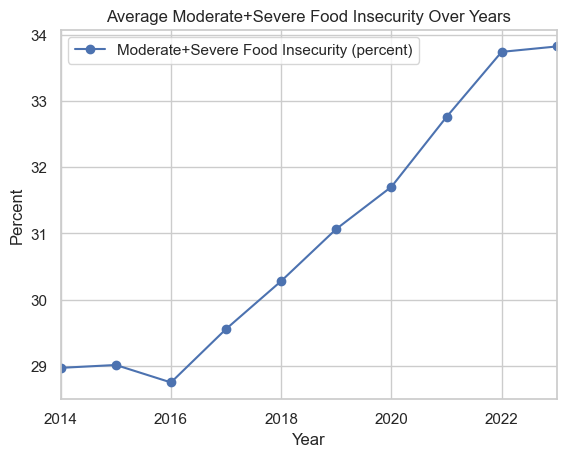

                                           SARIMAX Results                                           
Dep. Variable:     Moderate+Severe Food Insecurity (percent)   No. Observations:                   10
Model:                                        ARIMA(1, 1, 1)   Log Likelihood                  -6.236
Date:                                       Fri, 20 Jun 2025   AIC                             18.472
Time:                                               18:44:05   BIC                             19.064
Sample:                                           01-01-2014   HQIC                            17.195
                                                - 01-01-2023                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7657     

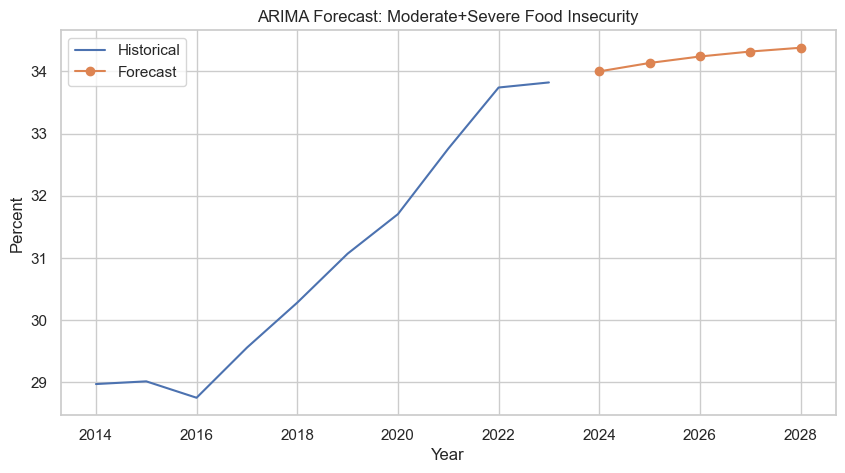

In [108]:
ts_data = df[['Year', 'Moderate+Severe Food Insecurity (percent)']]
ts_yearly = ts_data.groupby('Year').mean()

print("\n--- ARIMA Time Series Model ---")
ts_yearly = ts_data.groupby('Year').mean()
ts_yearly.index = pd.to_datetime(ts_yearly.index, format='%Y')
ts_yearly.index.freq = 'YS'

# Plot time series
ts_yearly.plot(title='Average Moderate+Severe Food Insecurity Over Years', marker='o')
plt.ylabel('Percent')
plt.grid(True)
plt.show()

# Fiting ARIMA model
try:
    model_arima = sm.tsa.ARIMA(ts_yearly, order=(1, 1, 1))
    model_fit_arima = model_arima.fit()
    print(model_fit_arima.summary())

    # Forecast next 5 years
    forecast_arima = model_fit_arima.forecast(steps=5)
    print("\nForecast for next 5 years:")
    print(forecast_arima)

    # Plot forecast
    forecast_index_arima = pd.date_range(start=ts_yearly.index[-1] + pd.DateOffset(years=1), periods=5, freq='YS')
    plt.figure(figsize=(10, 5))
    plt.plot(ts_yearly, label='Historical')
    plt.plot(forecast_index_arima, forecast_arima, label='Forecast', marker='o')
    plt.title("ARIMA Forecast: Moderate+Severe Food Insecurity")
    plt.xlabel("Year")
    plt.ylabel("Percent")
    plt.legend()
    plt.grid(True)
    plt.show()
except Exception as e:
    print(f"ARIMA model fitting failed: {e}. This often happens with short or non-stationary time series data.")


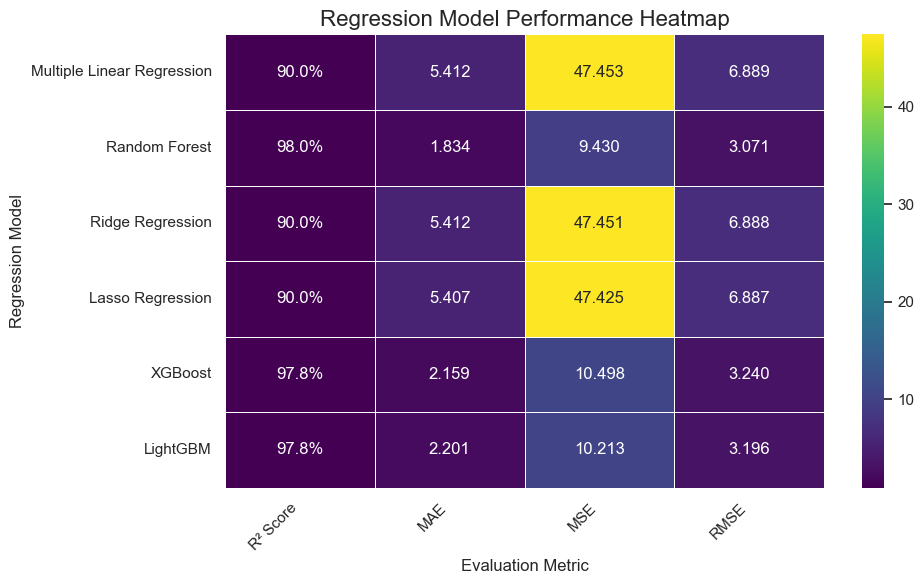

In [109]:
# Convert the results dictionary to a DataFrame and transpose
results_df = pd.DataFrame(results).T

# Rename columns for better readability
results_df.rename(columns={
    'R2': 'R² Score',
    'MAE': 'MAE',
    'MSE': 'MSE',
    'RMSE': 'RMSE'
}, inplace=True)

# Map internal model names to display names for the heatmap
model_display_names = {
    "Linear Regression": "Multiple Linear Regression",
    "Random Forest Regressor": "Random Forest",
    "Ridge Regression": "Ridge Regression",
    "Lasso Regression": "Lasso Regression",
    "XGBoost Regression": "XGBoost",
    "LightGBM Regression": "LightGBM"
}
results_df.index = results_df.index.map(model_display_names)

# Create a string-based DataFrame for annotation formatting
annot_df = results_df.copy()

# Format R² Score as percentage with 1 decimal place and % symbol
if 'R² Score' in annot_df.columns:
    annot_df['R² Score'] = annot_df['R² Score'].apply(lambda x: f"{x * 100:.1f}%")

# Format the other metrics to 3 decimal places
for col in annot_df.columns:
    if col != 'R² Score':
        annot_df[col] = annot_df[col].apply(lambda x: f"{x:.3f}")

# Plot heatmap using numerical data and formatted annotations
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=annot_df, fmt='', cmap='viridis', linewidths=.5)

plt.title('Regression Model Performance Heatmap', fontsize=16)
plt.xlabel('Evaluation Metric', fontsize=12)
plt.ylabel('Regression Model', fontsize=12)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Interpretation:

Best performance: We observe that LightGBM demonstrates the best performance, as indicated by the highest R² and lowest RMSE.

Traditional models: We can see that traditional models like Linear Regression, Ridge Regression, and Lasso Regression exhibit significantly higher errors across the board.

Top performers: Random Forest, XGBoost, and LightGBM are all excellent choices, with LightGBM appearing to be slightly ahead based on the metrics.

🎯 We can confidently consider using LightGBM or Random Forest for final prediction and deployment.

# 6. App using Clustering

In [4]:
# df_cluster.to_csv("df_cluster.csv", index=False)
# ts_yearly.to_csv("food_insecurity_ts.csv", index=False)

# Python app:
process = subprocess.Popen(["streamlit", "run", "app.py"])


In [ ]:
# Stop python app:
process.terminate()